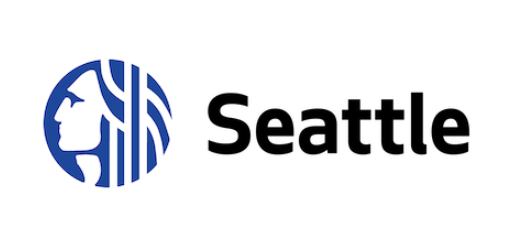

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
from datetime import datetime, date
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_column', 46)

# Contexte
Vous travaillez pour la ville de Seattle. Pour atteindre son objectif de ville neutre en émissions de carbone en 2050, votre équipe s’intéresse de près à la consommation et aux émissions des bâtiments non destinés à l’habitation.
Des relevés minutieux ont été effectués par les agents de la ville en 2016. Voici les données et leur source. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, vous voulez tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments non destinés à l’habitation pour lesquels elles n’ont pas encore été mesurées.



# Objectifs
Vous cherchez également à évaluer l’intérêt de l’**ENERGY STAR Score** pour la prédiction d’émissions, qui est fastidieux à calculer avec l’approche utilisée actuellement par votre équipe. Vous l'intégrerez dans la modélisation et jugerez de son intérêt.

Chargez le fichier `2016_Building_Energy_Benchmarking.csv` à l'aide de Pandas. Stockez le résultat du chargement dans la variable `df`.

In [2]:
df_2016 = pd.read_csv('2016_Building_Energy_Benchmarking.csv') 
df_2015 = pd.read_csv('2015_Building_Energy_Benchmarking.csv') 

Head() pour afficher les 5 premières lignes du dataframe `df`.

In [3]:
df_2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [4]:
df_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier
0,21548,2015,Multifamily LR (1-4),Low-Rise Multifamily,PUGET VISTA APTS,1992200030,"411 W REPUBLICAN ST\nSEATTLE, WA 98119\n(47.62...",7,MAGNOLIA / QUEEN ANNE,1967,1,4.0,40086,6133,33953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not Compliant,NaN
1,26379,2015,NonResidential,Hotel,GEORGETOWN INN,6920700025,"6100 CORSON AVE S\nSEATTLE, WA 98108\n(47.5477...",2,GREATER DUWAMISH,1992,1,3.0,22452,0,22452,Hotel,Hotel,22452.0,NaN,NaN,NaN,NaN,NaN,78.0,60.3,61.5,118.2,122.0,1354219.0,1381137.0,0.0,172881.0,589893.0,7644.0,764350.0,0.0,44.71,1.88,No,NaN,Compliant,NaN
2,26713,2015,Multifamily HR (10+),High-Rise Multifamily,QUINTESSA APTS,5247800955,"201 YESLER WAY\nSEATTLE, WA 98104\n(47.6015502...",7,DOWNTOWN,2007,1,13.0,90959,0,90959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,48.0,52.2,115.4,126.2,4361755.0,4748161.0,0.0,829363.0,2829904.0,15320.0,1531968.0,0.0,101.09,0.98,No,NaN,Compliant,NaN
3,102,2015,NonResidential,Hotel,MARRIOTT RESIDENCE INN,1984200065,"800 FAIRVIEW AVE N\nSEATTLE, WA 98109\n(47.626...",3,LAKE UNION,1990,1,7.0,282863,44766,238097,"Hotel, Parking",Hotel,235788.0,Parking,51537.0,NaN,NaN,NaN,40.0,79.9,85.3,178.1,186.6,18829136.0,20123722.0,0.0,3117920.0,10638785.0,81908.0,8190794.0,0.0,509.18,1.64,No,NaN,Compliant,NaN
4,503,2015,NonResidential,Supermarket/Grocery Store,RESTAURANT DEPOT,1824049003,"3670 E MARGINAL WAY S\nSEATTLE, WA 98134\n(47....",2,GREATER DUWAMISH,2008,1,1.0,63225,0,63225,Supermarket/Grocery Store,Supermarket/Grocery Store,63225.0,NaN,NaN,NaN,NaN,NaN,100.0,104.7,104.7,328.8,328.8,6619941.0,6619941.0,0.0,1940194.0,6620217.0,0.0,0.0,0.0,46.15,0.28,No,NaN,Compliant,NaN


la taille du dataframe avec shape

In [5]:
df_2016.shape

(3376, 46)

In [6]:
df_2015.shape

(3340, 42)

min, max, moyenne, écart type, etc) pour toutes les variables quantitatives avec describes

In [7]:
df_2016.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,3376.000000,3.376000e+03,3.356000e+03,1679.000000,596.000000,2533.000000,3369.000000,3370.000000,3367.000000,3367.000000,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,8001.526066,8.683201e+04,7.917764e+04,28444.075817,11738.675166,67.918674,54.732116,57.033798,134.232848,137.783932,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,32326.723928,2.079398e+05,2.017034e+05,54392.917928,29331.199286,26.873271,56.273124,57.163330,139.287554,139.109807,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,0.000000,2.775600e+04,2.509475e+04,5000.000000,2239.000000,53.000000,27.900000,29.400000,74.699997,78.400002,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,0.000000,4.321600e+04,3.989400e+04,10664.000000,5043.000000,75.000000,38.599998,40.900002,96.199997,101.099998,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,0.000000,8.427625e+04,7.620025e+04,26640.000000,10138.750000,90.000000,60.400002,64.275002,143.899994,148.349998,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,834.400024,834.400024,2620.000000,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


In [8]:
df_2015.describe()

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
count,3340.000000,3340.0,3340.000000,3340.000000,3340.000000,3332.000000,3.340000e+03,3340.000000,3.340000e+03,3.204000e+03,1559.000000,560.000000,2560.000000,3330.000000,3330.000000,3330.000000,3330.000000,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3330.000000,3330.000000
mean,20522.168263,2015.0,4.450898,1967.624850,1.035629,4.682173,9.077289e+04,11054.032335,7.971886e+04,7.488154e+04,27675.646568,10755.708929,67.894141,53.626126,57.586547,132.779730,138.936036,4.983106e+06,5.203055e+06,2.502851e+05,1.017897e+06,3.473209e+06,1.253304e+04,1.253304e+06,7.142301e+03,110.094102,0.985339
std,11511.515874,0.0,2.127203,32.949847,0.784463,5.458460,1.493058e+05,35296.330507,1.292314e+05,1.236249e+05,52480.843425,22618.529737,27.154057,53.893311,55.604963,131.943223,131.359121,1.375330e+07,1.400757e+07,3.481900e+06,2.789931e+06,9.519639e+06,4.415142e+04,4.415142e+06,1.962790e+05,409.450179,1.637172
min,1.000000,2015.0,1.000000,1900.000000,1.000000,0.000000,2.000000e+04,-3.000000,-5.055000e+04,5.872000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,-2.000000,-2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,19921.750000,2015.0,3.000000,1947.000000,1.000000,2.000000,2.848700e+04,0.000000,2.668300e+04,2.500000e+04,4959.000000,2385.250000,51.750000,27.300000,29.700000,73.500000,80.300000,9.139300e+05,9.883248e+05,0.000000e+00,1.864908e+05,6.363322e+05,0.000000e+00,0.000000e+00,0.000000e+00,9.265000,0.080000
50%,22977.000000,2015.0,4.000000,1973.000000,1.000000,4.000000,4.385500e+04,0.000000,4.132600e+04,3.900000e+04,10600.000000,5019.500000,76.000000,37.400000,40.900000,95.000000,102.800000,1.776219e+06,1.953996e+06,0.000000e+00,3.400320e+05,1.160236e+06,2.945500e+03,2.945770e+05,0.000000e+00,32.740000,0.460000
75%,25748.000000,2015.0,7.000000,1996.000000,1.000000,5.000000,8.842800e+04,4304.250000,7.872600e+04,7.206750e+04,26224.500000,10275.000000,90.000000,59.875000,65.575000,143.900000,151.275000,4.044277e+06,4.368462e+06,0.000000e+00,8.061935e+05,2.750847e+06,1.115325e+04,1.115366e+06,0.000000e+00,88.642500,1.180000
max,50059.000000,2015.0,7.000000,2015.000000,39.000000,99.000000,2.200000e+06,512608.000000,2.200000e+06,1.719643e+06,686750.000000,303910.000000,100.000000,800.600000,800.600000,2511.100000,2511.000000,2.958126e+08,2.977410e+08,1.278697e+08,8.344505e+07,2.847263e+08,1.364484e+06,1.364484e+08,8.269669e+06,11824.890000,31.380000


In [9]:
df_2016.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [10]:
df_2015.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

# Preparation regroupement

In [11]:
cols_2015 = set(df_2015.columns)
cols_2016 = set(df_2016.columns)
cols_difs_2015 = cols_2015.difference(cols_2016)
cols_difs_2016 = cols_2016.difference(cols_2015)
cols_inter = cols_2015.intersection(cols_2016)
print(f"Différentiel du nombre d'obsrevation 2016 vs 2015: {df_2016.shape[0] - df_2015.shape[0]}\n")
print(f"Nombre de variables présentes dans les deux relevés de 2015 et 2016: {len(cols_inter)}\n")
print("Variables partagées par les deux relevés de 2015 et 2016:")
display(cols_inter)
print("\n")
print("-"*50)
print("\n")
print(f"Nombre de variables présentes en 2015 mais absentes en 2016: {len(cols_difs_2015)}\n")
print("Variables présentes en 2015 et absente en 2016")
display(cols_difs_2015)
print("\n")
print("-"*50)
print("\n")
print(f"Nombre de variables présentes en 2016 mais absentes en 2015: {len(cols_difs_2016)}\n")
print("Variables présentes en 2016 mais absentes en 2015:")
display(cols_difs_2016)

Différentiel du nombre d'obsrevation 2016 vs 2015: 36

Nombre de variables présentes dans les deux relevés de 2015 et 2016: 37

Variables partagées par les deux relevés de 2015 et 2016:


{'BuildingType',
 'ComplianceStatus',
 'CouncilDistrictCode',
 'DataYear',
 'DefaultData',
 'ENERGYSTARScore',
 'Electricity(kBtu)',
 'Electricity(kWh)',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'ListOfAllPropertyUseTypes',
 'NaturalGas(kBtu)',
 'NaturalGas(therms)',
 'Neighborhood',
 'NumberofBuildings',
 'NumberofFloors',
 'OSEBuildingID',
 'Outlier',
 'PrimaryPropertyType',
 'PropertyGFABuilding(s)',
 'PropertyGFAParking',
 'PropertyGFATotal',
 'PropertyName',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SteamUse(kBtu)',
 'TaxParcelIdentificationNumber',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'YearBuilt',
 'YearsENERGYSTARCertified'}



--------------------------------------------------


Nombre de variables présentes en 2015 mais absentes en 2016: 5

Variables présentes en 2015 et absente en 2016


{'Comment',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Location',
 'OtherFuelUse(kBtu)'}



--------------------------------------------------


Nombre de variables présentes en 2016 mais absentes en 2015: 9

Variables présentes en 2016 mais absentes en 2015:


{'Address',
 'City',
 'Comments',
 'GHGEmissionsIntensity',
 'Latitude',
 'Longitude',
 'State',
 'TotalGHGEmissions',
 'ZipCode'}

In [12]:
print(f"Description de la variable GHGEmissions(MetricTonsCO2e) 2015 : \n\n",
      df_2015['GHGEmissions(MetricTonsCO2e)'].describe(),'\n \n','--'*30,
      f"\n\nDescription de la variable TotalGHGEmissions 2016 : \n\n", 
      df_2016['TotalGHGEmissions'].describe(),'\n \n','--'*30,
      f"\n\nDescription de la variable GHGEmissionsIntensity(kgCO2e/ft2) 2015 : \n\n", 
      df_2015['GHGEmissionsIntensity(kgCO2e/ft2)'].describe(),'\n \n','--'*30,
      f"\n\nDescription de la variable GHGEmissionsIntensity 2016 : \n\n", 
      df_2016['GHGEmissionsIntensity'].describe(),'\n \n','--'*30,
      f"\n\nNombres des commentaires pour l'année 2015 : \n\n",
      df_2015['Comment'].notna().sum(),'\n \n','--'*30,
       f"\n\nNombres des commentaires pour l'année 2016 : \n\n",
      df_2016['Comments'].notna().sum())

Description de la variable GHGEmissions(MetricTonsCO2e) 2015 : 

 count     3330.000000
mean       110.094102
std        409.450179
min          0.000000
25%          9.265000
50%         32.740000
75%         88.642500
max      11824.890000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64 
 
 ------------------------------------------------------------ 

Description de la variable TotalGHGEmissions 2016 : 

 count     3367.000000
mean       119.723971
std        538.832227
min         -0.800000
25%          9.495000
50%         33.920000
75%         93.940000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64 
 
 ------------------------------------------------------------ 

Description de la variable GHGEmissionsIntensity(kgCO2e/ft2) 2015 : 

 count    3330.000000
mean        0.985339
std         1.637172
min         0.000000
25%         0.080000
50%         0.460000
75%         1.180000
max        31.380000
Name: GHGEmissionsIntensity(kgCO2e/ft2), dtype: float64 
 
 ---

In [13]:
df_2015 = df_2015.rename(columns={'GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions',
                                  'GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity',
                                  'Comment':'Comments'})

Les différentes d'observations peuvent potentiellement s'expliquer par la mise en service de nouveaux bâtiments ou leur démolition entre les deux relevés.

En ce qui concernerne les différence de varibale nous pouvons constater deux cas:

Deux variables au noms différents aux valeurs simmilaires:

"Comments" en 2015 et "Comment" en 2016
Deux différents encodages de la même information. Dans cette catégorie figurent:

la varibale "Location" en 2015 décomposée en "Latitude" et "Longitude" en 2016
Variales au noms proches mais avec des valeurs différentes sur les mêmes observations

la variable "Zip Codes" en 2015 et "ZipCode" en 2016
la variable "GHGEmissionsIntensity(kgCO2e/ft2)" en 2015 et "'GHGEmissionsIntensity" en 2016
Variables présentes que dans un des deux relevés:

"2010 Census Tracts" (2015)
"City Council DIstricts" (2015)
"GHGEmissions(MetricTonsCO2e)" (2015)
"SPD Beats"
"Seattle Police Department Micro Community Policing Plan Areas"
"Address" (2016)
"City" (2016)
"State" (2016)
"TotalGHEmissions" (2016)
Observons maintenant les différences d'indexes des observations de chaque anné

In [14]:
idx_2015 = set(df_2015.index)
idx_2016 = set(df_2016.index)
print(f"Nombre d'observations du relevé de 2015 {len(idx_2015)}")
print(f"Nombre d'observations du relevé de 2016 {len(idx_2016)}")
print(f"Nombre d'observartion total des deux relevés {len(idx_2015 | idx_2016)}")
print(f"Nombre d'observations présentes dans les deux relevés {len(idx_2015 & idx_2016)}")
print(f"Nombre d'observations présentes dans le relevé de 2015 mais pas dans le relevé de 2016 {len(idx_2015 - idx_2016)}")
print(f"Nombre d'observation présentes dans le relevé de 2016 mais pas dans le relevé de 2015 {len(idx_2016 - idx_2015)}")

Nombre d'observations du relevé de 2015 3340
Nombre d'observations du relevé de 2016 3376
Nombre d'observartion total des deux relevés 3376
Nombre d'observations présentes dans les deux relevés 3340
Nombre d'observations présentes dans le relevé de 2015 mais pas dans le relevé de 2016 0
Nombre d'observation présentes dans le relevé de 2016 mais pas dans le relevé de 2015 36


On constate un nombre restraint d'obserbvations présentes dans une relevé mais pas dans un autre. Plusieurs hypothèse s'avèrent possibles pour expliquer le phénomène:

Inauguration de nouveaux bâtiments
Destruction de bâtiments
Travaux
La conséquence est qu'une majorité d'observation a fait l'objet de deux relevés de consommation énergétique. En conséquence il sera potentionnellement nécesssaire d'entraîner des modèles pour chaque année. Vérifions sur les données qui ont fait l'objet de deux relevés si les données de consommation d'énergie et d'émissions de CO2 ont des distributions similaires.

In [15]:
df_2015['Location'][1]

'6100 CORSON AVE S\nSEATTLE, WA 98108\n(47.5477336, -122.3207866)'

La méthode ast.literal_eval est une fonction qui aide à traverser un arbre syntaxique abstrait. Cette fonction évalue un nœud d'expression ou une chaîne composée d'une expression littérale Python ou d'un affichage de conteneur.

On utilise donc 'ast.literal_eval' pour splitter les valeurs de cette colonne:

In [16]:
# Address
df_2015["Address"] = df_2015['Location'].apply(
    lambda x: x.split('\n')[0])

In [17]:
df_2015["City,State Zip"] = df_2015['Location'].apply(
    lambda x: x.split('\n')[1])

In [18]:
# City
df_2015["City"] = df_2015['City,State Zip'].apply(
    lambda x: x.split(',')[0])

In [19]:
df_2015["State Zip"] = df_2015['City,State Zip'].apply(
    lambda x: x.split(',')[1])

In [20]:
# State
df_2015["State"] = df_2015['State Zip'].apply(
    lambda x: x.split(' ')[1])

In [21]:
# ZipCode
df_2015["ZipCode"] = df_2015['State Zip'].apply(
    lambda x: x.split(' ')[2])

In [22]:

df_2015["Lat-Long"] = df_2015['Location'].apply(
    lambda x: x.split('\n')[2])

In [23]:

df_2015["Latitude"] = df_2015['Lat-Long'].apply(
    lambda x: x.split(',')[0])

In [24]:
# Latitude
df_2015["Latitude"] = df_2015['Latitude'].apply(
    lambda x: x.split('(')[1])

In [25]:

df_2015["Longitude"] = df_2015['Lat-Long'].apply(
    lambda x: x.split(',')[1])

In [26]:
# Longitude
df_2015["Longitude"] = df_2015['Longitude'].apply(
    lambda x: x.split(')')[0])

In [27]:
print('la colonne OtherFuelUse(kBtu) contient',df_2015[df_2015["OtherFuelUse(kBtu)"]>0].shape[0],'lignes au total')

la colonne OtherFuelUse(kBtu) contient 17 lignes au total


In [28]:
# Suppression variable 'location'
df_2015.drop(['City,State Zip',
              'State Zip',
              'Lat-Long',
              'Location',
             'OtherFuelUse(kBtu)'], axis=1, inplace=True)
df_2015.shape

(3340, 46)

In [29]:
cols_2015 = set(df_2015.columns)
cols_2016 = set(df_2016.columns)
cols_difs_2015 = cols_2015.difference(cols_2016)
cols_difs_2016 = cols_2016.difference(cols_2015)
cols_inter = cols_2015.intersection(cols_2016)
print(f"Différentiel du nombre d'obsrevation 2016 vs 2015: {df_2016.shape[0] - df_2015.shape[0]}\n")
print(f"Nombre de variables présentes dans les deux relevés de 2015 et 2016: {len(cols_inter)}\n")
print("Variables partagées par les deux relevés de 2015 et 2016:")
display(cols_inter)
print("\n")
print("-"*50)
print("\n")
print(f"Nombre de variables présentes en 2015 mais absentes en 2016: {len(cols_difs_2015)}\n")
print("Variables présentes en 2015 et absente en 2016")
display(cols_difs_2015)
print("\n")
print("-"*50)
print("\n")
print(f"Nombre de variables présentes en 2016 mais absentes en 2015: {len(cols_difs_2016)}\n")
print("Variables présentes en 2016 mais absentes en 2015:")
display(cols_difs_2016)

Différentiel du nombre d'obsrevation 2016 vs 2015: 36

Nombre de variables présentes dans les deux relevés de 2015 et 2016: 46

Variables partagées par les deux relevés de 2015 et 2016:


{'Address',
 'BuildingType',
 'City',
 'Comments',
 'ComplianceStatus',
 'CouncilDistrictCode',
 'DataYear',
 'DefaultData',
 'ENERGYSTARScore',
 'Electricity(kBtu)',
 'Electricity(kWh)',
 'GHGEmissionsIntensity',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'Latitude',
 'ListOfAllPropertyUseTypes',
 'Longitude',
 'NaturalGas(kBtu)',
 'NaturalGas(therms)',
 'Neighborhood',
 'NumberofBuildings',
 'NumberofFloors',
 'OSEBuildingID',
 'Outlier',
 'PrimaryPropertyType',
 'PropertyGFABuilding(s)',
 'PropertyGFAParking',
 'PropertyGFATotal',
 'PropertyName',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'State',
 'SteamUse(kBtu)',
 'TaxParcelIdentificationNumber',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'TotalGHGEmissions',
 'YearBuilt',
 'YearsENERGYSTARCertified',
 'ZipCode'}



--------------------------------------------------


Nombre de variables présentes en 2015 mais absentes en 2016: 0

Variables présentes en 2015 et absente en 2016


set()



--------------------------------------------------


Nombre de variables présentes en 2016 mais absentes en 2015: 0

Variables présentes en 2016 mais absentes en 2015:


set()

# Regroupement des deux DataSet

In [30]:
df = pd.concat([df_2015[df_2016.columns],df_2016], 
                 axis = 0, copy=False).sort_values(["DataYear", "OSEBuildingID"])
df.shape

(6716, 46)

In [31]:
for col in df.columns:
    print(f'{col :-<70} {df[col].nunique()}')

OSEBuildingID--------------------------------------------------------- 3432
DataYear-------------------------------------------------------------- 2
BuildingType---------------------------------------------------------- 8
PrimaryPropertyType--------------------------------------------------- 32
PropertyName---------------------------------------------------------- 6527
Address--------------------------------------------------------------- 6379
City------------------------------------------------------------------ 2
State----------------------------------------------------------------- 1
ZipCode--------------------------------------------------------------- 83
TaxParcelIdentificationNumber----------------------------------------- 3729
CouncilDistrictCode--------------------------------------------------- 7
Neighborhood---------------------------------------------------------- 19
Latitude-------------------------------------------------------------- 6123
Longitude------------------------

In [32]:
#info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6716 entries, 241 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    6716 non-null   int64  
 1   DataYear                         6716 non-null   int64  
 2   BuildingType                     6716 non-null   object 
 3   PrimaryPropertyType              6716 non-null   object 
 4   PropertyName                     6716 non-null   object 
 5   Address                          6716 non-null   object 
 6   City                             6716 non-null   object 
 7   State                            6716 non-null   object 
 8   ZipCode                          6700 non-null   object 
 9   TaxParcelIdentificationNumber    6714 non-null   object 
 10  CouncilDistrictCode              6716 non-null   int64  
 11  Neighborhood                     6716 non-null   object 
 12  Latitude          

# Data Cleaning

 ## Bâtiment résidentiel/ non résidentiel
 
 Un bâtiment doit être considéré comme un bâtiment résidentiel lorsque plus de la moitié de la surface de plancher est utilisée à des fins d'habitation. Les autres bâtiments doivent être considérés comme non résidentiels.

Deux types de bâtiments résidentiels peuvent être distingués :

- maisons (bâtiments d'habitation en plain-pied) : comprenant tous les types de maisons (maisons individuelles, mitoyennes, mitoyennes, maisons en enfilade, etc.) dont chaque logement a sa propre entrée directement depuis le sol ;

- autres immeubles d'habitation : comprenant tous les immeubles d'habitation autres que les immeubles d'habitation en plain-pied tels que définis ci-dessus.

Un bâtiment est considéré comme un bâtiment non résidentiel lorsque la partie mineure du bâtiment (c'est-à-dire moins de la moitié de sa surface de plancher brute) est utilisée à des fins d'habitation.

Les bâtiments non résidentiels comprennent :

- bâtiments industriels ;
- les bâtiments commerciaux ;
- les bâtiments scolaires ;
- les bâtiments de santé ;
- d'autres bâtiments.

### ListOfAllPropertyUseTypes

In [33]:
df['ListOfAllPropertyUseTypes'] = df['ListOfAllPropertyUseTypes'].astype(str)

In [34]:
df["USE"] = df['ListOfAllPropertyUseTypes'].apply(
    lambda x: x.split(',')[0])

In [35]:
df["USE"].value_counts().index.tolist()

['Multifamily Housing',
 'Office',
 'Non-Refrigerated Warehouse',
 'K-12 School',
 'Other',
 'Hotel',
 'nan',
 'Medical Office',
 'Parking',
 'Distribution Center',
 'Retail Store',
 'Worship Facility',
 'Data Center',
 'College/University',
 'Fitness Center/Health Club/Gym',
 'Self-Storage Facility',
 'Supermarket/Grocery Store',
 'Bank Branch',
 'Senior Care Community',
 'Food Service',
 'Laboratory',
 'Financial Office',
 'Other - Entertainment/Public Assembly',
 'Residence Hall/Dormitory',
 'Other - Recreation',
 'Hospital (General Medical & Surgical)',
 'Food Sales',
 'Manufacturing/Industrial Plant',
 'Restaurant',
 'Automobile Dealership',
 'Fast Food Restaurant',
 'Refrigerated Warehouse',
 'Bar/Nightclub',
 'Lifestyle Center',
 'Social/Meeting Hall',
 'Other - Lodging/Residential',
 'Adult Education',
 'Museum',
 'Urgent Care/Clinic/Other Outpatient',
 'Repair Services (Vehicle',
 'Other/Specialty Hospital',
 'Other - Education',
 'Library',
 'Convenience Store without Gas Sta

In [36]:
df[df['USE']=='nan']

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,...,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,USE
289,15,2015,NonResidential,Hotel,HOTEL MONACO,1101 4TH AVE,SEATTLE,WA,98101,942000145,7,DOWNTOWN,47.60712147,-122.33431932,1969,1.0,11.0,153163,19279,133884,nan,NaN,NaN,...,NaN,NaN,NaN,NaN,48.0,101.1,107.2,200.8,205.2,1.471985e+07,1.561593e+07,3623542.0,1857347.0,6337531.0,47590.0,4759044.0,No,NaN,Compliant,NaN,576.63,3.59,nan
412,19,2015,NonResidential,Hotel,HOTEL VINTAGE PARK,1100 5TH AVE,SEATTLE,WA,98101,942000265,7,DOWNTOWN,47.60761642,-122.3323288,1922,1.0,11.0,67390,0,67390,nan,NaN,NaN,...,NaN,NaN,NaN,NaN,14.0,166.1,175.7,317.4,326.0,1.071145e+07,1.132923e+07,4403788.0,1198487.0,4089407.0,22184.0,2218425.0,No,NaN,Compliant,NaN,486.25,6.95,nan
171,25,2015,NonResidential,Hotel,DOUBLE TREE ARCTIC CLUB HOTEL - SEATTLE,700 3RD AVE,SEATTLE,WA,98104,942000610,7,DOWNTOWN,47.60397899,-122.3320576,1916,1.0,10.0,104352,0,104352,nan,NaN,NaN,...,NaN,NaN,NaN,NaN,83.0,75.2,74.9,119.5,118.6,7.845112e+06,7.816594e+06,3205497.0,524792.0,1790665.0,28490.0,2849024.0,No,NaN,Compliant,NaN,411.22,3.87,nan
490,46,2015,NonResidential,Distribution Center,SEATTLE WAREHOUSE OFFICE BUILDING,3301 S NORFOLK ST,SEATTLE,WA,98118,323049024,2,GREATER DUWAMISH,47.5106034,-122.29027588,1961,7.0,2.0,714095,0,714095,nan,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,66.9,64.7,210.0,203.3,4.784389e+07,4.631352e+07,0.0,14022240.0,47845869.0,0.0,0.0,No,NaN,Compliant,NaN,333.54,0.18,nan
201,67,2015,NonResidential,Hotel,QUALITY INN & SUITES - SEATTLE,618 JOHN ST,SEATTLE,WA,98109,1991200730,7,LAKE UNION,47.62037281,-122.3441465,1959,1.0,5.0,113173,42546,70627,nan,NaN,NaN,...,NaN,NaN,NaN,NaN,86.0,70.6,73.1,166.6,174.3,4.988241e+06,5.160438e+06,0.0,915988.0,3125480.0,18629.0,1862890.0,No,NaN,Compliant,NaN,120.73,0.95,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2321,25431,2016,Multifamily LR (1-4),Low-Rise Multifamily,PONDERAY APTS,5625 15TH AVE NE,Seattle,WA,98105.0,5226300030,4,NORTHEAST,47.67025,-122.31232,1963,NaN,4.0,28472,0,28472,nan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,27.1,28.0,NaN,NaN,7.702755e+05,7.975070e+05,NaN,NaN,NaN,NaN,NaN,False,NaN,Compliant,NaN,NaN,NaN,nan
2474,25752,2016,Multifamily LR (1-4),Low-Rise Multifamily,GRANVIEW APARTMENTS,1120 N 93RD ST,Seattle,WA,98103.0,9267200155,6,NORTHWEST,47.69658,-122.34342,1989,NaN,4.0,29562,8531,21031,nan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,Non-Compliant,NaN,NaN,NaN,nan
2480,25763,2016,Multifamily LR (1-4),Low-Rise Multifamily,Villa Andora,1520 CALIFORNIA AVE SW,Seattle,WA,98116.0,9272201340,1,SOUTHWEST,47.58968,-122.38587,1969,NaN,3.0,30420,0,30420,nan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,34.5,37.0,NaN,NaN,1.049639e+06,1.126782e+06,NaN,NaN,NaN,NaN,NaN,False,NaN,Compliant,NaN,NaN,NaN,nan
2670,26532,2016,NonResidential,Mixed Use Property,KALBERG BUILDING,4515 UNIVERSITY WAY NE,Seattle,WA,98105.0,8816401120,4,NORTHEAST,47.66182,-122.31345,1928,NaN,2.0,20760,0,20760,nan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,Non-Compliant,NaN,NaN,NaN,nan


On retire de la liste 
* Multifamily Housing
* Residence Hall/Dormitory
* Other - Lodging/Residential
* Residential Care Facility
* Senior Care Community
* Nan

In [37]:
non_residential_1 = [
    'Office',
    'Non-Refrigerated Warehouse',
    'K-12 School',
    'Other',
    'Hotel',
    'Medical Office',
    'Parking',
    'Distribution Center',
    'Retail Store',
    'Worship Facility',
    'Data Center',
    'Fitness Center/Health Club/Gym',
    'College/University',
    'Self-Storage Facility',
    'Supermarket/Grocery Store',
    'Laboratory',
    'Bank Branch',
    'Food Service',
    'Financial Office',
    'Other - Recreation',
    'Other - Entertainment/Public Assembly',
    'Hospital (General Medical & Surgical)',
    'Manufacturing/Industrial Plant',
    'Food Sales',
    'Restaurant',
    'nan',
    'Automobile Dealership',
    'Fast Food Restaurant',
    'Lifestyle Center',
    'Refrigerated Warehouse',
    'Bar/Nightclub',
    'Social/Meeting Hall',
    'Urgent Care/Clinic/Other Outpatient',
    'Library',
    'Repair Services (Vehicle',
    'Other - Education',
    'Adult Education',
    'Other/Specialty Hospital',
    'Museum',
    'Other - Mall',
    'Movie Theater',
    'Convenience Store without Gas Station',
    'Prison/Incarceration',
    'Pre-school/Daycare',
    'Personal Services (Health/Beauty',
    'Performing Arts',
    'Other - Services',
    'Strip Mall',
    'Courthouse',
    'Other - Public Services',
    'Police Station',
    'Other - Utility',
    'Fire Station',
    'Enclosed Mall',
    'Wholesale Club/Supercenter',
    'Convention Center',
    'Energy/Power Station']

In [38]:
df = df[df["USE"].isin(non_residential_1)]

L'objectif ici est d'identifier les possibles erreurs d'étiquette pour le property type, nous croisons les données de building type et primary property type

In [39]:
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Multifamily LR (1-4)', 'Multifamily HR (10+)',
       'Multifamily MR (5-9)', 'Nonresidential WA'], dtype=object)

### LargestPropertyUseType
vérification que notre filtre sur listofallproperty correspond bien à l'utilisation principale du batiment

In [40]:
df['LargestPropertyUseType'] = df['LargestPropertyUseType'].astype(str)

In [41]:
df['LargestPropertyUseType'].value_counts().index.tolist()

['Office',
 'Non-Refrigerated Warehouse',
 'K-12 School',
 'Other',
 'Retail Store',
 'Hotel',
 'nan',
 'Worship Facility',
 'Distribution Center',
 'Multifamily Housing',
 'Medical Office',
 'Supermarket/Grocery Store',
 'Parking',
 'Self-Storage Facility',
 'Other - Recreation',
 'Senior Care Community',
 'College/University',
 'Other - Entertainment/Public Assembly',
 'Restaurant',
 'Refrigerated Warehouse',
 'Laboratory',
 'Social/Meeting Hall',
 'Hospital (General Medical & Surgical)',
 'Manufacturing/Industrial Plant',
 'Repair Services (Vehicle, Shoe, Locksmith, etc)',
 'Residence Hall/Dormitory',
 'Automobile Dealership',
 'Strip Mall',
 'Museum',
 'Other - Services',
 'Fitness Center/Health Club/Gym',
 'Other - Education',
 'Bank Branch',
 'Urgent Care/Clinic/Other Outpatient',
 'Library',
 'Other/Specialty Hospital',
 'Performing Arts',
 'Other - Mall',
 'Financial Office',
 'Data Center',
 'Other - Utility',
 'Pre-school/Daycare',
 'Other - Restaurant/Bar',
 'Adult Education

On retrouve encore une utilisation principale pour de la résidence, nous élimons des champs
* Residence Hall/Dormitory
* Multifamily Housing
* Other - Lodging/Residential

In [42]:
non_residential_2 = ['Office',
 'Non-Refrigerated Warehouse',
 'K-12 School',
 'Other',
 'Retail Store',
 'Hotel',
 'Worship Facility',
 'Distribution Center',
 'Medical Office',
 'Supermarket/Grocery Store',
 'Other - Recreation',
 'Parking',
 'Self-Storage Facility',
 'College/University',
 'Other - Entertainment/Public Assembly',
 'Laboratory',
 'Refrigerated Warehouse',
 'Restaurant',
 'Hospital (General Medical & Surgical)',
 'Social/Meeting Hall',
 'Manufacturing/Industrial Plant',
 'nan',
 'Repair Services (Vehicle, Shoe, Locksmith, etc)',
 'Strip Mall',
 'Other - Services',
 'Fitness Center/Health Club/Gym',
 'Museum',
 'Automobile Dealership',
 'Bank Branch',
 'Other/Specialty Hospital',
 'Other - Education',
 'Other - Mall',
 'Urgent Care/Clinic/Other Outpatient',
 'Financial Office',
 'Library',
 'Performing Arts',
 'Data Center',
 'Prison/Incarceration',
 'Lifestyle Center',
 'Adult Education',
 'Other - Public Services',
 'Other - Restaurant/Bar',
 'Other - Utility',
 'Pre-school/Daycare',
 'Wholesale Club/Supercenter',
 'Police Station',
 'Courthouse',
 'Food Service',
 'Movie Theater',
 'Personal Services (Health/Beauty, Dry Cleaning, etc)',
 'Convention Center',
 'Fire Station']

In [43]:
df = df[df['LargestPropertyUseType'].isin(non_residential_2)]

### SecondLargestPropertyUseType

Vérification que nos filtres éliminent bien toutes les résidences

In [44]:
df['SecondLargestPropertyUseType'] = df['SecondLargestPropertyUseType'].astype(str)

In [45]:
df['SecondLargestPropertyUseType'].value_counts().index.tolist()

['nan',
 'Parking',
 'Office',
 'Retail Store',
 'Other',
 'Restaurant',
 'Non-Refrigerated Warehouse',
 'Data Center',
 'Fitness Center/Health Club/Gym',
 'Other - Services',
 'Medical Office',
 'Supermarket/Grocery Store',
 'Distribution Center',
 'Laboratory',
 'Other - Entertainment/Public Assembly',
 'Bank Branch',
 'K-12 School',
 'Other - Recreation',
 'Repair Services (Vehicle, Shoe, Locksmith, etc)',
 'Swimming Pool',
 'Multifamily Housing',
 'Self-Storage Facility',
 'Movie Theater',
 'Worship Facility',
 'Food Sales',
 'Performing Arts',
 'Hotel',
 'Other - Education',
 'Adult Education',
 'Other - Restaurant/Bar',
 'Bar/Nightclub',
 'Manufacturing/Industrial Plant',
 'Other - Public Services',
 'Refrigerated Warehouse',
 'Automobile Dealership',
 'Hospital (General Medical & Surgical)',
 'Convenience Store without Gas Station',
 'Food Service',
 'Residence Hall/Dormitory',
 'College/University',
 'Financial Office',
 'Other - Lodging/Residential',
 'Vocational School',
 'So

In [46]:
df[df['SecondLargestPropertyUseType'] =='Multifamily Housing']

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,...,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,USE
330,657,2015,NonResidential,Mixed Use Property,2200 WESTLAKE,2200 WESTLAKE AVE,SEATTLE,WA,98121,8729740000,7,DOWNTOWN,47.617939,-122.33738708,2006,1.0,0.0,516407,0,516407,"Financial Office, Hotel, Multifamily Housing, ...",Parking,385196.0,...,340236.0,Hotel,67627.0,NaN,19.0,94.800000,99.400000,220.500000,225.300000,48981052.00,5.132484e+07,0.0,8757760.0,29882718.0,190996.000000,19099575.0,No,NaN,Compliant,NaN,1222.69,2.12,Financial Office
729,20212,2015,NonResidential,Mixed Use Property,MARKET STREET HOLDINGS,2401 NW MARKET ST,SEATTLE,WA,98107,1125039011,6,BALLARD,47.66840403,-122.3879978,1960,1.0,4.0,20539,0,20539,"Medical Office, Multifamily Housing, Office, R...",Retail Store,7387.0,...,5264.0,Restaurant,3700.0,NaN,NaN,78.300000,79.700000,189.400000,190.800000,1622008.00,1.651053e+06,0.0,311343.0,1062348.0,5597.000000,559704.0,No,NaN,Compliant,NaN,37.13,1.59,Medical Office
1807,23368,2015,NonResidential,Mixed Use Property,SEABOARD BUILDING CONDOMINIUM,1500 4TH AVE,SEATTLE,WA,98101,7628750000,7,DOWNTOWN,47.6106807,-122.3365728,1909,1.0,11.0,111137,0,111137,"Bank Branch, Multifamily Housing, Office, Othe...",Office,42939.0,...,40878.0,Bank Branch,10887.0,NaN,NaN,92.800000,94.300000,203.300000,202.300000,9191826.00,9.337824e+06,0.0,1470280.0,5016804.0,41752.000000,4175230.0,No,NaN,Compliant,NaN,256.72,2.12,Bank Branch
488,657,2016,NonResidential,Mixed Use Property,2200 Westlake - SEDO,2200 Westlake Ave.,Seattle,WA,98121.0,8729740000,7,DOWNTOWN,47.61783,-122.33729,2006,0.0,0.0,516407,0,516407,"Financial Office, Hotel, Multifamily Housing, ...",Parking,385196.0,...,340236.0,Hotel,67627.0,NaN,31.0,76.300003,78.900002,199.199997,202.000000,39403320.00,4.075436e+07,0.0,8626261.0,29432803.0,99705.117190,9970512.0,False,NaN,Compliant,NaN,734.72,1.42,Financial Office
912,20212,2016,NonResidential,Mixed Use Property,Market Street Holdings,2401 NW Market St,Seattle,WA,98107.0,1125039011,6,BALLARD,47.6684,-122.38788,1960,1.0,4.0,20539,0,20539,"Medical Office, Multifamily Housing, Office, R...",Retail Store,7387.0,...,5264.0,Restaurant,3700.0,NaN,NaN,81.000000,81.800003,198.399994,199.300003,1678458.75,1.695248e+06,0.0,329257.5,1123427.0,5550.319824,555032.0,False,NaN,Compliant,NaN,37.31,1.82,Medical Office
1773,23368,2016,NonResidential,Mixed Use Property,Seaboard Building,1500-1506 4th Ave.,Seattle,WA,98011.0,7628750000,7,DOWNTOWN,47.61056,-122.33661,1909,1.0,11.0,111137,0,111137,"Bank Branch, Multifamily Housing, Office, Othe...",Office,42939.0,...,40878.0,Bank Branch,10887.0,NaN,NaN,96.400002,100.400002,198.300003,201.199997,9546165.00,9.946297e+06,0.0,1348902.5,4602455.0,49437.093750,4943709.0,False,NaN,Compliant,NaN,294.65,2.65,Bank Branch
2823,27100,2016,Multifamily HR (10+),Hotel,Four Seasons Hotel,99 Union Street,Seattle,WA,98101.0,6094680000,7,DOWNTOWN,47.60742,-122.33919,2008,1.0,20.0,326516,0,326516,"Hotel, Multifamily Housing, Parking, Retail Store",Hotel,252462.0,...,145594.0,Parking,22801.0,NaN,3.0,142.600006,145.199997,279.600006,280.799988,59107620.00,6.020290e+07,19654762.0,7131492.5,24332652.0,151202.046900,15120205.0,False,NaN,Compliant,NaN,2489.78,7.63,Hotel


In [47]:
df[df['SecondLargestPropertyUseType'] =='Residence Hall/Dormitory']

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,...,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,USE
111,234,2015,Nonresidential COS,Non-Refrigerated Warehouse,SEATTLE CITY LIGHT ROY STREET WAREHOUSE,800 ALOHA ST,SEATTLE,WA,98109,4088803530,7,MAGNOLIA / QUEEN ANNE,47.62651741,-122.340841,1926,1.0,2.0,50292,0,50292,"Non-Refrigerated Warehouse, Office, Other - Se...",Non-Refrigerated Warehouse,42345.0,...,5000.0,Office,4730.0,NaN,NaN,13.3,13.3,41.6,41.6,715446.0000,715446.0000,0.0,209685.0000,715475.0,0.0,0.0,No,NaN,Compliant,NaN,4.99,0.04,Non-Refrigerated Warehouse
146,234,2016,Nonresidential COS,Warehouse,SCL Roy Street Warehouse,802 Roy St,Seattle,WA,98109.0,4088803530,7,MAGNOLIA / QUEEN ANNE,47.62591,-122.34084,1926,1.0,2.0,50292,0,50292,"Non-Refrigerated Warehouse, Office, Other - Se...",Non-Refrigerated Warehouse,42345.0,...,5000.0,Office,4730.0,NaN,NaN,8.0,8.0,25.1,25.1,430473.6875,430473.6875,0.0,126164.6016,430474.0,0.0,0.0,False,NaN,Compliant,NaN,3.00,0.06,Non-Refrigerated Warehouse


### ThirdLargestPropertyUseType

In [48]:
df['ThirdLargestPropertyUseType'] = df['ThirdLargestPropertyUseType'].astype(str)

In [49]:
df['ThirdLargestPropertyUseType'].value_counts().index.tolist()

['nan',
 'Office',
 'Retail Store',
 'Other',
 'Parking',
 'Restaurant',
 'Non-Refrigerated Warehouse',
 'Data Center',
 'Swimming Pool',
 'Medical Office',
 'Food Service',
 'Social/Meeting Hall',
 'Pre-school/Daycare',
 'Bank Branch',
 'Other - Restaurant/Bar',
 'Other - Entertainment/Public Assembly',
 'Fitness Center/Health Club/Gym',
 'Financial Office',
 'Distribution Center',
 'Multifamily Housing',
 'Other - Recreation',
 'Other - Education',
 'Personal Services (Health/Beauty, Dry Cleaning, etc)',
 'Laboratory',
 'Convenience Store without Gas Station',
 'Other - Services',
 'Self-Storage Facility',
 'Refrigerated Warehouse',
 'Manufacturing/Industrial Plant',
 'Other - Technology/Science',
 'Supermarket/Grocery Store',
 'Fast Food Restaurant',
 'Hotel',
 'Other/Specialty Hospital',
 'K-12 School',
 'Bar/Nightclub',
 'Other - Utility',
 'Vocational School',
 'Strip Mall',
 'Enclosed Mall']

In [50]:
df[df['ThirdLargestPropertyUseType'] =='Multifamily Housing']

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,...,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,USE
510,419,2015,Campus,Mixed Use Property,MAIN MARKET,1501 PIKE PL,SEATTLE,WA,98101,1976200205,7,DOWNTOWN,47.60876917,-122.3411538,1908,1.0,4.0,137400,0,137400,"Food Sales, Multifamily Housing, Office, Other...",Retail Store,44078.0,...,19182.0,Multifamily Housing,14380.0,NaN,NaN,114.100000,114.100000,358.300000,358.300000,13883385.0,13883385.0,0.0,4068987.00,13883960.0,0.00000,0.0,No,NaN,Compliant,NaN,96.79,0.27,Food Sales
1648,21533,2015,NonResidential,Mixed Use Property,HYATT PLACE,110 6TH AVE N,SEATTLE,WA,98109,1991200695,7,LAKE UNION,47.6189677,-122.3446084,2008,1.0,4.0,274442,105499,168943,"Hotel, Multifamily Housing, Parking, Retail Store",Hotel,108763.0,...,105499.0,Multifamily Housing,58152.0,NaN,NaN,53.600000,56.500000,125.800000,131.800000,9049598.0,9544963.0,0.0,1648636.00,5625380.0,34245.00000,3424452.0,No,NaN,Compliant,NaN,221.09,0.72,Hotel
3205,49776,2015,NonResidential,Large Office,MARKET PLACE TOWER,2025 1ST AVE,SEATTLE,WA,98121,1977200471,7,DOWNTOWN,47.61131062,-122.3439771,1988,1.0,13.0,358259,149326,208933,"Data Center, Multifamily Housing, Office, Othe...",Office,194687.0,...,149326.0,Multifamily Housing,38225.0,"2016, 2009, 2008",81.0,62.500000,66.700000,188.800000,199.600000,14935251.0,15934393.0,0.0,4129655.00,14090968.0,8449.00000,844867.0,No,NaN,Compliant,Low Outlier,143.10,0.23,Data Center
289,419,2016,Campus,Mixed Use Property,Main Market,1501 Pike Place,Seattle,WA,98101.0,1976200205,7,DOWNTOWN,47.60881,-122.34119,1908,1.0,4.0,137400,0,137400,"Food Sales, Multifamily Housing, Office, Other...",Retail Store,44078.0,...,19182.0,Multifamily Housing,14380.0,NaN,NaN,122.800003,122.300003,306.600006,305.000000,14940504.0,14879755.0,0.0,3031866.75,10344729.0,45957.73828,4595774.0,False,NaN,Compliant,NaN,316.20,2.30,Food Sales
1328,21533,2016,NonResidential,Mixed Use Property,Hyatt Place,110 6th Ave N,Seattle,WA,98109.0,1991200695,7,LAKE UNION,47.61893,-122.34473,2008,1.0,4.0,274442,0,274442,"Hotel, Multifamily Housing, Parking, Retail Store",Hotel,108763.0,...,105499.0,Multifamily Housing,58152.0,NaN,NaN,54.200001,56.299999,128.199997,132.600006,9155568.0,9512996.0,0.0,1689621.25,5764988.0,33905.78906,3390579.0,False,NaN,Compliant,NaN,220.26,0.80,Hotel
3199,49776,2016,NonResidential,Large Office,Market Place Tower,2025 1st Avenue,Seattle,WA,98121.0,1977200471,7,DOWNTOWN,47.61156,-122.34401,1988,1.0,13.0,354086,149326,204760,"Data Center, Multifamily Housing, Office, Othe...",Office,193393.0,...,149326.0,Multifamily Housing,38225.0,201620092008,88.0,56.700001,59.299999,167.699997,174.399994,13458948.0,14070366.0,0.0,3601493.50,12288296.0,11706.50879,1170651.0,False,NaN,Compliant,NaN,147.84,0.42,Data Center


In [51]:
# pd.cross tab
pd.crosstab(df['PrimaryPropertyType'],
            df['BuildingType'])

BuildingType,Campus,Multifamily HR (10+),Multifamily LR (1-4),Multifamily MR (5-9),NonResidential,Nonresidential COS,Nonresidential WA,SPS-District K-12
PrimaryPropertyType,,,,,,,,
College/University,5,0,1,0,16,0,0,0
Distribution Center,0,0,0,0,53,2,0,0
Distribution Center\n,0,0,0,0,49,2,0,0
High-Rise Multifamily,0,5,0,0,0,0,0,0
Hospital,0,0,0,0,20,0,0,0
Hotel,0,1,0,0,149,0,0,0
K-12 School,8,0,0,0,78,0,0,189
Laboratory,0,0,0,0,11,0,0,0
Large Office,2,0,0,0,331,7,0,0


### Multifamily HR (10+)

In [52]:
df.loc[(df['BuildingType'] == 'Multifamily HR (10+)') & (
            df['PrimaryPropertyType'] != 'High-Rise Multifamily'), ['PrimaryPropertyType','PropertyName','Address','USE']]

,PrimaryPropertyType,PropertyName,Address,USE
1014,Other,THE OLIVIAN,809 OLIVE WAY,Other
876,Other,The Olivian,809 Olive Way,Other
2823,Hotel,Four Seasons Hotel,99 Union Street,Hotel


Nous considérons que Other et Hotel comme étant non résidentiel

In [53]:
df.loc[876,'BuildingType'] = 'NonResidential'
df.loc[2823,'BuildingType'] = 'NonResidential'

Nous savons que l'hotel Four Season n'est un pas considéré comme un bâtiment résidentiel. Les hôtels sont des établissements commerciaux

In [54]:
#supression  
df.drop(df[df['BuildingType'] == 'Multifamily HR (10+)'].index, inplace = True)

In [55]:
df.loc[(df['BuildingType'] != 'Multifamily HR (10+)') & (
            df['PrimaryPropertyType'] == 'High-Rise Multifamily'), ['BuildingType','PropertyName','Address']]

,BuildingType,PropertyName,Address


In [56]:
#supression  
df.drop(df[df['PrimaryPropertyType'] == 'High-Rise Multifamily'].index, inplace = True)

### Multifamily LR (1-4)
* Si nous retrouvons des Senior care service, ils sont considérées comme des bâtiments résidentiels. Elles sont conçues pour offrir un logement et des soins de qualité aux personnes âgées. Nous n'apporterons pas de modification
* Other peut également décrire des bâtiments résidentiels, type des batiments de communauté

In [57]:
df.loc[(df['BuildingType'] == 'Multifamily LR (1-4)') & (
    df['PrimaryPropertyType'] != 'Low-Rise Multifamily'), ['PrimaryPropertyType', 'PropertyName', 'Address','USE']]

,PrimaryPropertyType,PropertyName,Address,USE
1179,Senior Care Community,LEON SULLIVAN HEALTH CARE CENTER,2611 S DEARBORN ST,nan
724,Small- and Mid-Sized Office,QUEENVIEW APTS,621 W GALER ST,Office
1765,Other,ELDORADO II CONDO,3601 24TH AVE W,Other
1544,Senior Care Community,NORTHGATE PLAZA,11030 5TH AVE NE,nan
2087,Other,RETAIL/ARTIST'S LOFT,111 S LANDER ST,Other
3073,College/University,ALPHA CHI OMEGA SORORITY,4545 17TH AVE NE,College/University
1076,Small- and Mid-Sized Office,Queenview Apartments,621 W Galer St,Office
1444,Other,ELDORADO II,3601 24th Ave West,Other
2142,Other,ID 3551996 - Lander Artist Studios,111 S LANDER ST,Other
2773,University,NW Alpha Chi Omega,4545 17th Ave,College/University


Comme précédemment, on considère Other, small mid office et university comme étant non résidentiel

In [58]:
df.loc[1076,'BuildingType'] = 'NonResidential'
df.loc[1444,'BuildingType'] = 'NonResidential'
df.loc[2142,'BuildingType'] = 'NonResidential'
df.loc[2773,'BuildingType'] = 'NonResidential'

In [59]:
#supression  
df.drop(df[df['BuildingType'] == 'Multifamily LR (1-4)'].index, inplace = True)

In [60]:
df.loc[(df['BuildingType'] != 'Multifamily LR (1-4)') & (
    df['PrimaryPropertyType'] == 'Low-Rise Multifamily'), ['BuildingType', 'PropertyName', 'Address','USE']]

,BuildingType,PropertyName,Address,USE


In [61]:
#supression  
df.drop(df[df['PrimaryPropertyType'] == 'Low-Rise Multifamily'].index, inplace = True)

### Multifamily MR (5-9)

In [62]:
df.loc[(df['BuildingType'] == 'Multifamily MR (5-9)') & (
            df['PrimaryPropertyType'] != 'Mid-Rise Multifamily'), ['PrimaryPropertyType', 'PropertyName', 'Address','USE']]

,PrimaryPropertyType,PropertyName,Address,USE


In [63]:
#supression  
df.drop(df[df['BuildingType'] == 'Multifamily MR (5-9)'].index, inplace = True)

In [64]:
df.loc[(df['BuildingType'] != 'Multifamily MR (5-9)') & (
            df['PrimaryPropertyType'] == 'Mid-Rise Multifamily'), ['PrimaryPropertyType', 'PropertyName', 'Address','USE']]

,PrimaryPropertyType,PropertyName,Address,USE


In [65]:
#supression  
df.drop(df[df['PrimaryPropertyType'] == 'Mid-Rise Multifamily'].index, inplace = True)

### Senior Care Community

In [66]:
df.loc[(df['BuildingType'] != 'NonResidential')&(df['PrimaryPropertyType'] == 'Senior Care Community'), ['BuildingType', 'PropertyName', 'Address','USE']]

,BuildingType,PropertyName,Address,USE


In [67]:
df.loc[1647,'BuildingType'] = 'NonResidential'
df.loc[1883,'BuildingType'] = 'NonResidential'
df.loc[2814,'BuildingType'] = 'NonResidential'

ValueError: cannot reindex from a duplicate axis

### NonResidential
Nous allons devoir éliminer les étiquettes suivantes catégorisé actuellement comme non résidentiel 
* Residence Hall : Les résidences étudiantes sont considérées comme des bâtiments résidentiels.
* Senior Care Community

In [ ]:
df.loc[(df['BuildingType'] == 'NonResidential') & (
            df['PrimaryPropertyType'] == 'Residence Hall'), ['PrimaryPropertyType', 'PropertyName', 'Address','USE']]

In [ ]:
df.loc[(df['BuildingType'] == 'NonResidential') & (
            df['PrimaryPropertyType'] == 'Senior Care Community'), ['PrimaryPropertyType', 'PropertyName', 'Address','USE']]

Nous n'obserons pas de champs abérants, l'ensemble de row donne une indication sur des batiments résidentiels

In [ ]:
df.drop(df[df['PrimaryPropertyType'] == 'Senior Care Community'].index, inplace = True)

Nous terminons ici le filtrage des éléments résidentiels/non résidentiels, notre jeu de donnée semble concerné maintenant uniquement les éléments non résidentiels comme nous le souhaitions

### Campus
Les campus universitaires ne sont généralement pas considérés comme des bâtiments résidentiels, mais plutôt comme des complexes universitaires. Un campus universitaire est un ensemble de bâtiments et de terrains qui appartiennent à une université ou à une école et qui sont utilisés pour l'enseignement, la recherche et d'autres activités universitaires. Les campus universitaires comprennent souvent des salles de classe, des laboratoires, des bibliothèques, des restaurants, des centres sportifs et d'autres installations

In [ ]:
df.loc[(df['BuildingType'] == 'Campus'), ['PrimaryPropertyType', 'PropertyName', 'Address','USE']]

On effectue des modifications sur les 4 elements **Mixed Use Property**

In [ ]:
# pd.cross tab
pd.crosstab(df['PrimaryPropertyType'],
            df['BuildingType'])

### Mixed Use Property

Nous traiterons par la suite les batiments avec l'étiquette **Mixed Use Property**
* **Mixed use property** is property with a residential and non-residential part, for example, a shop with an apartment upstairs

Les hôtels ne sont pas considérés comme des bâtiments résidentiels. Les hôtels sont des établissements commerciaux qui offrent des chambres et des suites à des clients qui voyagent pour affaires ou pour le plaisir.

Nous utiliserons regex pour pouvoir appliquer et cibler pour conserver uniquement les batiments résidentiels

In [ ]:
df['Name'] = df.loc[(df['PrimaryPropertyType'] == 'Mixed Use Property'), ['PropertyName']].astype(str)

In [ ]:
df.loc[(df['PrimaryPropertyType'] == 'Mixed Use Property'), ['Name']].value_counts().index.tolist()

Nous allons pouvoir filtrer par les mots suivants caractérisant des batiments non résidentiel
* Center, Fitness, Food, Market, Bank,BANK, Hotel, Office, Sculpture, Club, Museum, Art, Metro,University


Nous avons remarqué d'autres nom dans la liste, il s'agit de non résidentiel
* Hyatt Place,Automobili Italiane

In [ ]:
import re

In [ ]:
Center = re.compile('Center')
Fitness = re.compile('Fitness')
Food = re.compile('Food')
Market = re.compile('Market')
Bank = re.compile('Bank')
BANK = re.compile('BANK')
Hotel = re.compile('Hotel')
Office = re.compile('Office')
Sculpture = re.compile('Sculpture')
Club = re.compile('Club')
Museum = re.compile('Museum')
Art = re.compile('Art')
Metro = re.compile('Metro')
University = re.compile('University')

In [ ]:
Hyatt_Place = re.compile('Hyatt Place')
Automobili_Italiane = re.compile('Automobili Italiane')

In [ ]:
df['Center'] = df['Name'].str.extract('(Center)', expand=True)
df['Fitness'] = df['Name'].str.extract('(Fitness)', expand=True)
df['Food'] = df['Name'].str.extract('(Food)', expand=True)
df['Market'] = df['Name'].str.extract('(Market)', expand=True)
df['Bank'] = df['Name'].str.extract('(Bank)', expand=True)
df['BANK'] = df['Name'].str.extract('(BANK)', expand=True)
df['Hotel'] = df['Name'].str.extract('(Hotel)', expand=True)
df['Office'] = df['Name'].str.extract('(Office)', expand=True)
df['Sculpture'] = df['Name'].str.extract('(Sculpture)', expand=True)
df['Club'] = df['Name'].str.extract('(Club)', expand=True)
df['Museum'] = df['Name'].str.extract('(Museum)', expand=True)
df['Art'] = df['Name'].str.extract('(Art)', expand=True)
df['Metro'] = df['Name'].str.extract('(Metro)', expand=True)
df['University'] = df['Name'].str.extract('(University)', expand=True)

In [ ]:
df['Hyatt_Place'] = df['Name'].str.extract('(Hyatt Place)', expand=True)
df['Automobili_Italiane'] = df['Name'].str.extract('(Automobili Italiane)', expand=True)

In [ ]:
df[(df['Center'] == 'Center')
   | (df['Fitness'] == 'Fitness')
   | (df['Food'] == 'Food')
   | (df['Market'] == 'Market')
   | (df['Bank'] == 'Bank')
   | (df['BANK'] == 'BANK')
   | (df['Hotel'] == 'Hotel')
   | (df['Office'] == 'Office')
   | (df['Sculpture'] == 'Sculpture')
   | (df['Club'] == 'Club')
   | (df['Museum'] == 'Museum')
   | (df['Art'] == 'Art')
   | (df['Metro'] == 'Metro')
   | (df['University'] == 'University')
   | (df['Hyatt_Place'] == 'Hyatt Place')
   | (df['Automobili_Italiane'] == 'Automobili Italiane')]

In [ ]:
df.loc[18,'PrimaryPropertyType'] = 'Office'
df.loc[373,'PrimaryPropertyType'] = 'Other'
df.loc[459,'PrimaryPropertyType'] = 'Distribution Center'
df.loc[474,'PrimaryPropertyType'] = 'Distribution Center'
df.loc[656,'PrimaryPropertyType'] = 'Non-Refrigerated Warehouse'
df.loc[784,'PrimaryPropertyType'] = 'Office'
df.loc[796,'PrimaryPropertyType'] = 'Other'
df.loc[830,'PrimaryPropertyType'] = 'Other'
df.loc[912,'PrimaryPropertyType'] = 'Retail Store'
df.loc[968,'PrimaryPropertyType'] = 'Other'
df.loc[986,'PrimaryPropertyType'] = 'Retail Store'
df.loc[1000,'PrimaryPropertyType'] = 'Other'
df.loc[1134,'PrimaryPropertyType'] = 'Office'
df.loc[1328,'PrimaryPropertyType'] = 'Hotel'
df.loc[2073,'PrimaryPropertyType'] = 'Non-Refrigerated Warehouse'
df.loc[2080,'PrimaryPropertyType'] = 'Retail Store'
df.loc[2095,'PrimaryPropertyType'] = 'Other'
df.loc[2167,'PrimaryPropertyType'] = 'Other'
df.loc[2248,'PrimaryPropertyType'] = 'Other'
df.loc[2671,'PrimaryPropertyType'] = 'Other'
df.loc[2686,'PrimaryPropertyType'] = 'Hotel'
df.loc[2782,'PrimaryPropertyType'] = 'Other'
df.loc[3129,'PrimaryPropertyType'] = 'Other'
df.loc[3134,'PrimaryPropertyType'] = 'Other'
df.loc[3321,'PrimaryPropertyType'] = 'Office'
df.loc[3360,'PrimaryPropertyType'] = 'Other'
df.loc[3368,'PrimaryPropertyType'] = 'Other'

In [ ]:
# pd.cross tab
pd.crosstab(df['PrimaryPropertyType'],
            df['BuildingType'])

Nous avons retravaillé avec la fonction regex le Mixed Use Property	qui nous semblant pas suffisamment précis

In [ ]:
sns.set_context("talk") # scaling automatique selon type de présentation ('notebook', 'paper', 'talk', 'poster')

for column in ['BuildingType']:
    chaine = 'Répartition en fonction du : ' + column
    plt.figure(figsize=(7,3), dpi=80)
    df[column].value_counts(normalize=True, ascending = True).plot(kind='barh', width=0.9)
    axes = plt.gca()
    axes.set_frame_on(False) 
    axes.yaxis.grid(False) 
    plt.xticks([], [])
    plt.title(chaine)

    for i, v in enumerate(df[column].value_counts(normalize=True, ascending = True)):
        plt.text(v, i, " "+str(int(round(v*100,0)))+"%", color='r', va='center', fontweight='bold')
        
    plt.show()

In [ ]:
sns.set_context("talk")

for column in ['PrimaryPropertyType']:
    chaine = 'Répartition en fonction du : ' + column
    plt.figure(figsize=(10,7), dpi=100)
    df.loc[(df['BuildingType']=="NonResidential"),column].\
    value_counts(normalize=True, ascending = True).plot(kind='barh', width=0.9) 
    axes = plt.gca()
    axes.set_frame_on(False)
    axes.yaxis.grid(False) 
    plt.xticks([], []) 
    plt.title(chaine)

    for i, v in enumerate(df.loc[(df['BuildingType']=="NonResidential"),column].\
    value_counts(normalize=True, ascending = True)):
        plt.text(v, i, " "+str(int(round(v*100,0)))+"%", color='b', va='center', fontweight='bold')
        
    plt.show()

## NumberofBuildings
On observe les valeurs min et max
* 50 adresses avec 0 batiment
* 1 adresse avec 111 Batiments


In [ ]:
df['NumberofBuildings'].value_counts(ascending=False)

### Min()

In [ ]:
df['NumberofBuildings'].min()

In [ ]:
df.loc[(df['NumberofBuildings'] == 0) , ['PrimaryPropertyType', 'PropertyName', 'Address','USE']]

In [ ]:
# On remplace 0 par 1
df['NumberofBuildings'] = np.where((df.NumberofBuildings == 0), 1,df.NumberofBuildings)

### Max()

In [ ]:
df['NumberofBuildings'].max()

In [ ]:
df[df['NumberofBuildings']==111]

## NumberofFloors

In [ ]:
df['NumberofFloors'].value_counts(ascending=False)

In [ ]:
df[df['NumberofFloors'].isna()]

In [ ]:
df.dropna(subset=['NumberofFloors'], axis=0,inplace=True)

### NumberofFloors ==0

In [ ]:
# 0
df[df['NumberofFloors'] == 0][['PropertyName','Address']]

* Grand Hyatt Seattle >> 30 étages
* Arnold Pavilion > 10 étages
* Pacific Place >> 5 étages
* HART First Hill LLC >> 5 étages
* Sandpoint #25	 > 2 étages
* Sandpoint #29	 > 2 étages
* Magnuson>> 1 étage
* University of Washington - Seattle Campus>> 2 étages

Il ne doit rester que
* (ID#24086)Campus1:KC Metro 
* Sandpoint #5	
* Smilow Rainier Vista Boys & Girls Club

In [ ]:
df.loc[166,'NumberofFloors'] = 30
df.loc[488,'NumberofFloors'] = 2
df.loc[487,'NumberofFloors'] = 10
df.loc[564, 'NumberofFloors'] = 5
df.loc[1754, 'NumberofFloors'] = 5
df.loc[3131, 'NumberofFloors'] = 2
df.loc[3132, 'NumberofFloors'] = 2
df.loc[3168, 'NumberofFloors'] = 1
df.loc[3274, 'NumberofFloors'] = 2

In [ ]:
df[df['NumberofFloors'] == 0][['PropertyName','Address']]

### NumberofFloors == 99

In [ ]:
# 99 : erreur?
df[df['NumberofFloors'] == 99]

Ce bâtiment correspond à la Chinese Baptist Church de Seattle. C'est une erreur de saisie, on transformera 99 en 0.

In [ ]:
df['NumberofFloors'] = np.where((df.NumberofFloors == 99), 0,df.NumberofFloors)

In [ ]:
df.shape

## Property UseType GFA

**Le GFA**, ou "surface de plancher autorisée", est une mesure de la surface de plancher d'un bâtiment. Cela peut inclure la surface de tous les étages du bâtiment, y compris les sous-sols et les étages supérieurs, mais exclut les garages, les terrasses et les balcons. 

In [ ]:
# définition des variables GFA
GFA_values = ['LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
                          'ThirdLargestPropertyUseTypeGFA', 'PropertyGFATotal', 
                          'PropertyGFABuilding(s)', 'PropertyGFAParking']

In [ ]:
#Create a boxplot
for col in GFA_values:
    sns.boxplot(df[col])
    plt.title(col)
    plt.xticks(rotation='90')
    plt.tight_layout()
    plt.show()
    print(df[col].describe())

In [ ]:
# min value
for col in GFA_values:
    print(f'{col :-<70} {df[col].min()}')

In [ ]:
#nan
for col in GFA_values:
    print(f'{col :-<70} {df[col].isna().sum()}')

**SecondLargestPropertyUseType(GFA)** et **ThirdLargestPropertyUseType(GFA)** désignent les surfaces des 2e et 3e utilisation du bâtiment, Ici nous faisons le choix de remplacer les nan par 0

### Drop valeurs abérrantes de GFA

In [ ]:
df.loc[(df['LargestPropertyUseTypeGFA'] > df['PropertyGFATotal']), ['PropertyName', 'LargestPropertyUseTypeGFA','PropertyGFATotal']]

In [ ]:
df.loc[(df['PropertyGFABuilding(s)'] > df['PropertyGFATotal']), ['PropertyName', 'PropertyGFABuilding(s)','PropertyGFATotal']]

In [ ]:
df.loc[(df['PropertyGFAParking'] > df['PropertyGFATotal']), ['PropertyName', 'PropertyGFAParking','PropertyGFATotal']]

In [ ]:
df.loc[(df['SecondLargestPropertyUseTypeGFA'] > df['LargestPropertyUseTypeGFA']), ['PropertyName', 'SecondLargestPropertyUseTypeGFA','LargestPropertyUseTypeGFA']]

In [ ]:
df.loc[(df['ThirdLargestPropertyUseTypeGFA'] > df['LargestPropertyUseTypeGFA']), ['PropertyName', 'ThirdLargestPropertyUseTypeGFA','LargestPropertyUseTypeGFA']]

In [ ]:
df.loc[(df['ThirdLargestPropertyUseTypeGFA'] > df['SecondLargestPropertyUseTypeGFA']), ['PropertyName', 'ThirdLargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA']]

In [ ]:
# élimination des builting ou la surface totale est stictement inférieure à la surface de la plus grande  utilisation
df = df.loc[(df['LargestPropertyUseTypeGFA'] <= df['PropertyGFATotal'])]

### PropertyUseType == Parking

In [ ]:
df.loc[(df['LargestPropertyUseType'] == 'Parking') & (df['PropertyGFAParking'] == 0), 
    ['PrimaryPropertyType', 'PropertyName', 'LargestPropertyUseType','LargestPropertyUseTypeGFA','PropertyGFAParking', 'USE']]

Nous retrouvons des données GFA parking incohérentes, nous supprimons ces 5 batiments

In [ ]:
df.loc[301, 'PropertyGFAParking'] = np.nan
df.loc[488, 'PropertyGFAParking'] = np.nan
df.loc[2095, 'PropertyGFAParking'] = np.nan
df.loc[2798, 'PropertyGFAParking'] = np.nan
df.loc[2800, 'PropertyGFAParking'] = np.nan

In [ ]:
df.dropna(subset=['PropertyGFAParking'], axis=0,inplace=True)

In [ ]:
df.loc[(df['SecondLargestPropertyUseType'] == 'Parking') & (
    df['SecondLargestPropertyUseTypeGFA'] == 0) & (df['PropertyGFAParking'] != 0),
    ['PropertyName', 'Address', 'USE', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'PropertyGFAParking']]

In [ ]:
df.loc[155,'SecondLargestPropertyUseTypeGFA'] = 327680
df.loc[319,'SecondLargestPropertyUseTypeGFA'] = 115228
df.loc[356,'SecondLargestPropertyUseTypeGFA'] = 187878
df.loc[401,'SecondLargestPropertyUseTypeGFA'] = 7450
df.loc[875,'SecondLargestPropertyUseTypeGFA'] = 11250
df.loc[1522,'SecondLargestPropertyUseTypeGFA'] = 43035
df.loc[2896,'SecondLargestPropertyUseTypeGFA'] = 38585
df.loc[2985,'SecondLargestPropertyUseTypeGFA'] = 14570

In [ ]:
df.loc[(df['ThirdLargestPropertyUseType'] == 'Parking') &
       (df['ThirdLargestPropertyUseTypeGFA'] == 0) & (df['PropertyGFAParking'] != 0),
       ['PropertyName', 'Address', 'USE', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA','PropertyGFAParking']]

In [ ]:
df.loc[356,'ThirdLargestPropertyUseTypeGFA'] = 187878

### Surface = 0 remplace par np.nan

In [ ]:
df[df['SecondLargestPropertyUseTypeGFA']==0]

In [ ]:
df['SecondLargestPropertyUseTypeGFA'] = np.where((df.SecondLargestPropertyUseTypeGFA == 0), np.nan ,df.SecondLargestPropertyUseTypeGFA)

In [ ]:
df[df['ThirdLargestPropertyUseTypeGFA']==0]

In [ ]:
df['ThirdLargestPropertyUseTypeGFA'] = np.where((df.SecondLargestPropertyUseTypeGFA == 0), np.nan ,df.ThirdLargestPropertyUseTypeGFA)

## Energy Feature
* SiteEUI (kBtu/sf): EUI signifie "Indice d'Utilisation de l'Energie". Cette unité mesure l'utilisation totale d'énergie d'un site par unité de surface. Elle est souvent utilisée pour comparer l'efficacité énergétique de différents bâtiments.
<br>
<br>
* SiteEUIWN (kBtu/sf): Cette unité est similaire à SiteEUI, mais elle prend en compte les variations climatiques en utilisant un facteur de correction appelé "facteur de normalisation".
<br>
<br>
* SourceEUI (kBtu/sf): Cette unité mesure l'utilisation d'énergie d'une source spécifique (par exemple, l'électricité ou le gaz naturel) par unité de surface.
<br>
<br>
* SourceEUIWN (kBtu/sf): Cette unité est similaire à SourceEUI, mais elle utilise le facteur de normalisation pour tenir compte des variations climatiques.
<br>
<br>
* SiteEnergyUse (kBtu): Cette unité mesure l'utilisation totale d'énergie d'un site.
<br>
<br>
* SiteEnergyUseWN (kBtu): Cette unité est similaire à SiteEnergyUse, mais elle utilise le facteur de normalisation pour tenir compte des variations climatiques.
<br>
<br>
* SteamUse (kBtu): Cette unité mesure l'utilisation de vapeur d'eau pour fournir de l'énergie à un site.
<br>
<br>
* Electricity (kWh): Cette unité mesure l'utilisation d'électricité en kilowatts-heure.
<br>
<br>
* Electricity (kBtu): Cette unité mesure l'utilisation d'électricité en unités de chaleur.
<br>
<br>
* NaturalGas (therms): Cette unité mesure l'utilisation de gaz naturel en therms. Un therm est une unité de mesure de l'énergie qui correspond à la quantité de chaleur nécessaire pour chauffer un pied cube d'eau de 100 degrés Fahrenheit à l'aide de gaz naturel.
<br>
<br>
* NaturalGas (kBtu): Cette unité mesure l'utilisation de gaz naturel en unités de chaleur.

Un kBtu est égal à 1 000 Btu, qui est une unité d'énergie souvent utilisée aux États-Unis pour mesurer la production de chaleur des appareils et la capacité de chauffage et de refroidissement des systèmes 

On ne conservce que les mesures interessantes pour la suite de notre étude à savoir :  SiteEUI (kBtu/sf), SourceEUI (kBtu/sf), SourceEUI (kBtu/sf),SteamUse(kBtu), Electricity (kBtu) et NaturalGas (kBtu)

In [ ]:
Energy = ['SiteEUI(kBtu/sf)','SourceEUI(kBtu/sf)',
          'SiteEnergyUse(kBtu)','SteamUse(kBtu)',
          'Electricity(kBtu)','NaturalGas(kBtu)']

In [ ]:
df[Energy].isna().sum()

### Missing value

In [ ]:
df.loc[(df['SiteEUI(kBtu/sf)'].isna() == True), 
['PrimaryPropertyType', 'PropertyName', 'Address', 'SiteEUI(kBtu/sf)','SiteEnergyUse(kBtu)','PropertyGFATotal']]

On remarque que SiteEnergyUse(kBtu) est à 0, nous allons donc chercher à connaitre cette a valeur avant de calculer SiteEUI(kBtu/sf)

In [ ]:
df.loc[(df['SiteEUI(kBtu/sf)'] == 0), 
['PrimaryPropertyType', 'PropertyName', 'Address', 'SiteEUI(kBtu/sf)','SiteEnergyUse(kBtu)','PropertyGFATotal']]

### SiteEnergyUse(kBtu)

Il suffit d'addictionner l'électricité, le gaz et d'autres sources d'énergie utilisées sur le site pour obtenir l'utilisation totale de l'énergie du site.

In [ ]:
df.loc[(df['SiteEnergyUse(kBtu)'] == 0),
       ['PrimaryPropertyType', 'PropertyName', 'Address', 'SiteEnergyUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)']]

**Washington State Convention Center** était notre batiment en Nan, on remarque aucune donnée en Electricity(kBtu) ou NaturalGas(kBtu) ou stream, nous suprimons donc ce batiment

Nous allons éliminer les autres batiments ou la consommation d'énergie est à 0 

In [ ]:
df.loc[28,'SiteEnergyUse(kBtu)'] = np.nan
df.loc[304,'SiteEnergyUse(kBtu)'] = np.nan
df.loc[746,'SiteEnergyUse(kBtu)'] = np.nan

In [ ]:
df.dropna(subset=['SiteEnergyUse(kBtu)'], axis=0,inplace=True)

Nous allons pouvoir renseigner la feature SiteEnergyUse(kBtu) en fonction des données dont nous disposons en Electricity(kBtu) ou NaturalGas(kBtu)
* pour rappel : SiteEnergyUse(kBtu =  Electricity(kBtu) + NaturalGas(kBtu) + SteamUse(kBtu)

In [ ]:
df.loc[95,'SiteEnergyUse(kBtu)'] = 2104286.0
df.loc[133,'SiteEnergyUse(kBtu)'] = 4318917.0
df.loc[139,'SiteEnergyUse(kBtu)'] = 3217877.0
df.loc[614,'SiteEnergyUse(kBtu)'] = 1957268.0
df.loc[630,'SiteEnergyUse(kBtu)'] = 1433596.0

In [ ]:
df[Energy].isna().sum()

### Vérification SiteEnergyUse(kBtu) est différent de 0 alors que les sources d'énergie ont 0

In [ ]:
df.loc[(df['SiteEnergyUse(kBtu)'] != 0) & (df['Electricity(kBtu)'] == 0) & (df['NaturalGas(kBtu)'] == 0) & (df['SteamUse(kBtu)'] == 0),
       ['PrimaryPropertyType', 'PropertyName', 'Address', 'SiteEnergyUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)']]

In [ ]:
df.loc[513,'SiteEnergyUse(kBtu)'] = np.nan

In [ ]:
df.dropna(subset=['SiteEnergyUse(kBtu)'], axis=0,inplace=True)

### SiteEUI(kBtu/sf)
Site EUI (kBtu/sf) = SiteEnergyUse (kBtu) / Building Area (sf)

In [ ]:
df.loc[(df['SiteEUI(kBtu/sf)'] == 0), 
['PrimaryPropertyType', 'PropertyName', 'Address', 'SiteEUI(kBtu/sf)','SiteEnergyUse(kBtu)','PropertyGFATotal']]

In [ ]:
df.loc[95,'SiteEUI(kBtu/sf)'] = 2104286.0/66588.0
df.loc[133,'SiteEUI(kBtu/sf)'] = 4318917.0/160270.0
df.loc[139,'SiteEUI(kBtu/sf)'] = 3217877.0/136188.0
df.loc[614,'SiteEUI(kBtu/sf)'] = 1957268.0/52924.0
df.loc[630,'SiteEUI(kBtu/sf)'] = 1433596.0/55353.0

## Emissions Feature
'TotalGHGEmissions' et 'GHGEmissionsIntensity' sont des mesures liées aux émissions de gaz à effet de serre.

* TotalGHGEmissions' fait référence à la quantité totale de gaz à effet de serre émis . Cette valeur est généralement mesurée en unités d'équivalent dioxyde de carbone (CO2e)
<br>
<br>
* GHGEmissionsIntensity est probablement une mesure des émissions de gaz à effet de serre par unité d'un autre paramètre, tel que le PIB ou la population. Cette mesure est souvent utilisée pour montrer les progrès réalisés par un pays ou une entreprise dans la réduction de ses émissions de gaz à effet de serre par rapport à sa croissance économique ou démographique.

In [ ]:
Emissions=['TotalGHGEmissions','GHGEmissionsIntensity']

In [ ]:
df[Emissions].isna().sum()

In [ ]:
df[Emissions].describe()

### TotalGHGEmissions
Elimination de la donnée avec une émission CO2 négative

In [ ]:
df.loc[(df['TotalGHGEmissions'] <= 0), 
['PrimaryPropertyType', 'PropertyName', 'Address', 'GHGEmissionsIntensity']]

In [ ]:
df.loc[3206,'TotalGHGEmissions'] = np.nan

In [ ]:
df.dropna(subset=['TotalGHGEmissions'], axis=0,inplace=True)

### HGEmissionsIntensity
Supression de cette feature pour la suite de notre étude

In [ ]:
df.drop(['GHGEmissionsIntensity'], axis=1,inplace=True)

## Drop Feature

In [ ]:
df.columns

In [ ]:
pd.crosstab(df['ComplianceStatus'],
            df['DefaultData'])

In [ ]:
df.drop(['Address', 'City', 'State', 'ZipCode',
         'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
         'YearsENERGYSTARCertified', 'USE', 'Name',
         'Center', 'Fitness', 'Food', 'Market', 'Bank', 'BANK', 'Hotel',
         'Office', 'Sculpture', 'Club', 'Museum', 'Art', 'Metro', 'University',
         'Hyatt_Place', 'Automobili_Italiane', 'Comments', 'SiteEUIWN(kBtu/sf)', 
         'SourceEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)', 'Electricity(kWh)', 
         'NaturalGas(therms)', 'Outlier', 'ComplianceStatus', 'Neighborhood', 'DefaultData'], axis=1, inplace=True)

Colonnes n'apportant pas d'information pour la suite de notre étude, elles peuvent etre interessantes pour une analyse plus descriptives car elles se focalisent sur l'emplacement :
* la feature 'OSEBuildingID' nous donne un ID, nous utiliserons l'index du Dataframe
* Les features "City" et "State" comportent toujours les mêmes valeurs (Seattle, WA).
* Les features "Adress", "ZipCode" , 'TaxParcelIdentificationNumber'et 'CouncilDistrictCode'donnent des informations sur la localisation. Nous gardons uniquement Neighborhood, Latitude/Longitude ainsi pouvoir réaliser des visualisations avec geopanda
* Les feature "DefaultData" et 'ComplianceStatus' donnent des informations sur l'ajout de valeurs par défaut, mais sans préciser laquelle.
* La feature 'Outlier' doit aider à trouver les outliers, nous ferons notre propre étude
* La feature 'ListOfAllPropertyUseTypes'


## Duplicate value

In [ ]:
df.duplicated(keep=False).value_counts()

In [ ]:
df.duplicated(subset=['OSEBuildingID']).value_counts()

Notre jeu de donnée de comporte pas de doublons, nous pouvons passer à la partie Feature Engineering

# Feature Engineering

## Build Age

In [ ]:
df['Build_Age'] = df['DataYear'] - df['YearBuilt']

In [ ]:
df['Build_Age'].max()

In [ ]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1)
sns.set_style('whitegrid')
sns.countplot(x='Build_Age', data=df).set(title='Visualisation du nombre de batiments en fonction de ancienneté')
plt.tick_params(axis='x', rotation=90)
plt.show()

In [ ]:
df.columns

In [ ]:
df.drop(['OSEBuildingID', 'DataYear','YearBuilt'], axis=1, inplace=True)

## Surface avec GFA

In [ ]:
df = df.assign(Diff_surface=lambda x: (x['PropertyGFATotal'] -
               x['PropertyGFAParking'] - x['PropertyGFABuilding(s)']))

In [ ]:
df['Diff_surface'].value_counts()

Nous trouvons bien que tous nos batiments ou la surface totale est égale à la surface des batiments + surface du parking

In [ ]:
df.drop(['Diff_surface'], axis=1, inplace=True)

La somme des surfaces de 3 activités ne nous donne pas toujours une équivalence avec la surface total, il s'agit certainement d'un différence due au données des batiments ayant plus de 3 activités et dont nous ne connaissons pas la surface. Nous retirons donc ces surfaces pour la suite de notre études. Nous gardons uniquement la surface du batiment principal

In [ ]:
df.drop(['SecondLargestPropertyUseTypeGFA','SecondLargestPropertyUseType',
       'ThirdLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA'], axis=1, inplace=True)

## Surface Nb de Building

In [ ]:
df = df.assign(surface_nb_building=lambda x: round( x['PropertyGFATotal'] / x['NumberofBuildings'], 2))

In [ ]:
df.drop(['NumberofBuildings'], axis=1, inplace=True)

## Nombre d'activités

In [ ]:
# Splittez la colonne en utilisant la méthode str.split()
df['ListOfAllPropertyUseTypes_split'] = df['ListOfAllPropertyUseTypes'].str.split(',')

In [ ]:
# Compter le nombre d'éléments dans chaque ligne en utilisant apply()
df['nombre_activités'] = df['ListOfAllPropertyUseTypes_split'].apply(lambda x: len(x))

In [ ]:
df.drop(['ListOfAllPropertyUseTypes_split'], axis=1, inplace=True)

## Energy
Nous calculons le poucentage de chaque energy ('SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu) en fonction de l'énergy total use

In [ ]:
df = df.assign(pourcentage_Electricity=lambda x: round( x['Electricity(kBtu)'] / x['SiteEnergyUse(kBtu)']*100, 2))

In [ ]:
df = df.assign(pourcentage_NaturalGas=lambda x: round( x['NaturalGas(kBtu)'] / x['SiteEnergyUse(kBtu)']*100, 2))

In [ ]:
df = df.assign(pourcentage_SteamUse=lambda x: round( x['SteamUse(kBtu)'] / x['SiteEnergyUse(kBtu)']*100, 2))

In [ ]:
df[[ 'pourcentage_Electricity', 'pourcentage_NaturalGas', 'pourcentage_SteamUse']]

In [ ]:
df.drop(['Electricity(kBtu)','NaturalGas(kBtu)','SteamUse(kBtu)'], axis=1, inplace=True)

## Localisation batiment - Geopandas

In [ ]:
# Create a geometry column by constructing Point objects from the lon and lat columns
df['geometry'] = df.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)

In [ ]:
# Create a GeoDataFrame from the DataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')

In [ ]:
gdf.crs

In [ ]:
gdf = gdf[gdf.is_valid == True]

In [ ]:
gdf['geometry'].centroid
gdf.plot(column = "BuildingType",legend=True)

In [ ]:
df.drop(['Longitude', 'Latitude'], axis=1, inplace=True)

In [ ]:
df.drop(['BuildingType', 'PropertyName',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA','SiteEUI(kBtu/sf)',
       'SourceEUI(kBtu/sf)'],axis=1,inplace=True)

In [ ]:
#les total de data pour chaque feature et le pourcentage de missing value
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

In [ ]:
df.columns

# Distribution

In [ ]:
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
import scipy.stats as st

In [ ]:
for col in df.select_dtypes(include=np.number):
        w, pvalue = st.shapiro(df[col])
        seuil = 0.05
        print(f'{col :-<50} {w} {pvalue}')
        if pvalue > seuil:
            print(
                "On ne peux pas rejetter H0: la distribution suit une loi normale")
        else:
            print(
                "On rejette H0 : la distribution ne suit pas une loi normale")

# La transformation Logarithmique
La transformation logarithmique consiste tout simplement à appliquer la fonction log à chacune des valeurs de la variable à transformer. Vous utilisez ensuite dans votre analyse la nouvelle variable constituée des résultats de la fonction log au lieu des données originales. Cette transformation a un impact marqué sur la distribution d'une variable. Elle permet en général de rapprocher des valeurs extrêmes pour obtenir des graphes de distribution moins étendus.

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
to_log = ['PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions',
       'Build_Age', 'surface_nb_building',
       'NumberofFloors', 'nombre_activités', 'pourcentage_Electricity',
       'pourcentage_NaturalGas', 'pourcentage_SteamUse']

In [ ]:
# apply log(x+1) element-wise to a subset of columns
df_log = df[to_log].applymap(lambda x: np.log(x+1))

# rename columns
df_log.columns = 'log_' + df_log.columns

In [ ]:
log = ['log_PropertyGFATotal', 'log_PropertyGFAParking',
       'log_PropertyGFABuilding(s)', 'log_SiteEnergyUse(kBtu)',
       'log_TotalGHGEmissions', 'log_Build_Age', 'log_surface_nb_building',
       'log_NumberofFloors', 'log_nombre_activités',
       'log_pourcentage_Electricity', 'log_pourcentage_NaturalGas',
       'log_pourcentage_SteamUse']

In [ ]:
# réprésentation avec un displot avant transformation logarithmique
for col in to_log :
    plt.figure(figsize=(16, 4))
    sns.distplot(df[col], label="skew: "+str(np.round(df[col].skew(),2)))
    plt.title(col + "Before")
    plt.legend()

In [ ]:
# réprésentation avec un displot après transformation logarithmique
for col in log : 
    plt.figure(figsize=(16, 4))
    sns.distplot(df_log[col], label="skew: "+str(np.round(df_log [col].skew(),2)))
    plt.title(col + "After")
    plt.legend()
    plt.show()

In [ ]:
df_primary_type = df[[ 'PrimaryPropertyType']]

In [ ]:
# concat les deux variables à prédire et PrimaryPropertyType
df_log = pd.concat([df_log, df_primary_type],  axis=1)

# Analyse Outliers


In [ ]:
df_PrimaryPropertyType = df_log["PrimaryPropertyType"].unique()

In [ ]:
df_PrimaryPropertyType

In [ ]:
df_detect_outliers=[]
for PropertyType in df_PrimaryPropertyType:
    for col in log:
        q1 = df_log[df_log['PrimaryPropertyType'] == PropertyType][col].quantile(.25)
        q3 = df_log[df_log['PrimaryPropertyType'] == PropertyType][col].quantile(.75)
        IQR = q3 - q1
        upper_boundary = q3 + (1.5 * IQR)
        lower_boundary = q1 - (1.5 * IQR)
        select = df_log[df_log['PrimaryPropertyType'] == PropertyType]
        outliers = select.loc[(select[col] > upper_boundary) | (
            select[col] < lower_boundary), [col]]
        print(
            f"pour le groupe {PropertyType} et la feature {col}")
        print(
            f"il y a {len(outliers)} outliers")
        df_detect_outliers.append({'PropertyType': PropertyType, 'Feature': col,'outliers': len(outliers)})
        
        without_outliers = select.loc[(select[col] < upper_boundary) | (
            select[col] > lower_boundary), [col]]
        df_outlier = pd.DataFrame(without_outliers, columns=df_log.columns)
        plt.subplot(212)
        sns.boxplot(df_outlier[col])
        plt.title(" Visualisation des Outliers")
        plt.tight_layout()
        plt.show()

In [ ]:
df_detect_outliers = pd.DataFrame(df_detect_outliers).reset_index(drop=True)
df_detect_outliers.sort_values(by='outliers', ascending=False)

In [ ]:
#df_clean = df_log.copy()

#for PropertyType in df_PrimaryPropertyType:
#    for col in log_col:
#        q1 = df_log[df_log['PrimaryPropertyType'] == PropertyType][col].quantile(.25)
#        q3 = df_log[df_log['PrimaryPropertyType'] == PropertyType][col].quantile(.75)
#        IQR = q3 - q1
#        upper_boundary = q3 + (1.5 * IQR)
#        lower_boundary = q1 - (1.5 * IQR)
#        select = df_log[df_log['PrimaryPropertyType'] == PropertyType]
#        df_clean.reset_index(inplace=True, drop=True)
#        outliers_index = select.loc[(select[col] > upper_boundary) | (select[col] < lower_boundary)].index
#        if len(outliers_index)>0:
#            df_clean = df_clean[~df_clean.index.isin(outliers_index)]
#

In [ ]:
#df_log = df_clean.copy()

# Analyse univariée

In [ ]:
import scipy.stats as stats

In [ ]:
# les données au format numérique sont listées dans data_num 
data_num = df_log.select_dtypes('number').columns

In [ ]:
data_cat = ['PrimaryPropertyType']

# Analyse Bivariée

In [ ]:
for col in data_cat:
    plt.figure(figsize=(15,6))
    sns.countplot(x=col,data=df_log, order = df_log[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.xlabel(col, fontsize=15)
    plt.ylabel('Nombre de produits', fontsize=15)
    plt.title('Representation du '+  col, fontsize=15)
    plt.show()

In [ ]:
# les medianes des primary property type par features
df_gb = df_log.groupby(["PrimaryPropertyType"]).median()

In [ ]:
# declaring data
for col in log:
    data = df_gb[col]
    property_type = df["PrimaryPropertyType"].unique()
    plt.figure(figsize=[16, 8])
    plt.pie(data, labels=property_type, autopct='%.0f%%')
    plt.title(col +' en fonction du PrimaryPropertyType', fontsize=25)
    # displaying chart
    plt.show()

## Matrice de Corrélation

In [ ]:
# Compute the correlation matrix
corr = df_log.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [ ]:
corr_min = 0.5
corr_pairs = corr.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > corr_min)])
               .reset_index().rename(columns={0:'coef_correl'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('coef_correl', ascending=False).head(15)

In [ ]:
for col in log:
    plt.figure(figsize=[16, 8])
    sns.set(font_scale=2)
    sns.boxplot(x=df_log["PrimaryPropertyType"], y=col, data=df_log, showmeans=True,color='white')
    plt.title("Visualisation de "+ col + "en fonction du PrimaryPropertyType", fontsize=25)
    plt.xticks(rotation='90')
    plt.show()

# Analyse des variables à prédire
Les 2 variables à prédire sont :

* TotalGHGEmissions
* SiteEnergyUse(kBtu)

In [ ]:
pred_1 = df_log['log_SiteEnergyUse(kBtu)']
pred_2 = df_log['log_TotalGHGEmissions']

## SiteEnergyUse(kBtu)

In [ ]:
plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x=df_log["PrimaryPropertyType"], y=pred_1,
            data=df_log, showmeans=True, color='white')
plt.title("Visualisation du PrimaryPropertyTypede en fonction de SiteEnergyUse(kBtu)", fontsize=25)
plt.xticks(rotation='90')
plt.show()

In [ ]:
for col in df_log.select_dtypes(include=np.number):
    fig = plt.figure(figsize=[12, 8])
    plt.scatter(pred_1,df_log[col], alpha=0.5,
            color='#ffd966', label='données')
    plt.title("Visualisation "+col+" vs SiteEnergyUse(kBtu)", fontsize=25)
    plt.xlabel('SiteEnergyUse(kBtu)', fontsize=15)
    plt.ylabel(col, fontsize=15)
    plt.show()

## TotalGHGEmissions

In [ ]:
plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x=df_log["PrimaryPropertyType"], y=pred_2,
            data=df_log, showmeans=True, color='white')
plt.title("Visualisation du PrimaryPropertyTypede en fonction de 'TotalGHGEmissions'", fontsize=25)
plt.xticks(rotation='90')
plt.show()

In [ ]:
for col in df_log.select_dtypes(include=np.number):
    fig = plt.figure(figsize=[12, 8])
    plt.scatter(pred_2,df_log[col], alpha=0.5,
            color='#ffd966', label='données')
    plt.title("Visualisation "+col+" vs TotalGHGEmissions", fontsize=25)
    plt.xlabel('TotalGHGEmissions', fontsize=15)
    plt.ylabel(col, fontsize=15)
    plt.show()

# Tests d'hypothèses
L'ANOVA (analyse de la variance) est une méthode statistique utilisée pour vérifier s'il existe une différence significative entre les moyennes de deux groupes ou plus. Pour utiliser l'ANOVA, les hypothèses suivantes doivent être vérifiées :

* Normalité des résidus : Les données doivent être normalement distribuées au sein de chaque groupe. Cette hypothèse peut être vérifiée en visualisant les données ou en utilisant un test de normalité, tel que le test de Shapiro-Wilk.
<br>
<br>
* Indépendance : Les observations au sein de chaque groupe doivent être indépendantes les unes des autres. En d'autres termes, les observations ne doivent pas être liées d'une manière qui pourrait affecter les résultats du test.
<br>
<br>
* Variance égale : Les variances des groupes doivent être approximativement égales. Cette hypothèse peut être vérifiée à l'aide d'un test d'égalité de variance, tel que le test de Levene

## Distribution normale des résidus
On réalise le test de Shapiro-Wilk pour vérifier la normalité des résidus. A noter qu'on utilisera ensuite également une droite de Henry pour vérifier cette hypothèse de normalité.

In [ ]:
for col in log:
        w, pvalue = st.shapiro(df_log[col])
        seuil = 0.05
        print(f'{col :-<50} {w} {pvalue}')
        if pvalue > seuil:
            print(
                "On ne peux pas rejetter H0: la distribution des résidus suit une loi normale")
        else:
            print(
                "On rejette H0 : la distribution des résidus ne suit pas une loi normale")

In [ ]:
#qqpolot vs. loi normale (droite de Henry)
for col in log:
    sm.qqplot(df_log[col],stats.t, fit=True, line="45")
    plt.title("Q-Q norm droite de Henry")
    print(col)
    plt.show()


La pvalue étant inférieure au seuil de 5%, on peut en conclure que la distribution des résidus ne suit pas une loi normale

## Homoscédasticité

Pour teste l'homoscédasticité on peut utiliser le test de Levene.

In [ ]:
df_log['PrimaryPropertyType'].value_counts()

In [ ]:
# Homoscédasticité : Test de Levene
for col in log:
    alpha = 0.05
    result = st.levene(df_log[df_log['PrimaryPropertyType'] == 'Small- and Mid-Sized Office'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Other'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Warehouse'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Large Office'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'K-12 School'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Retail Store'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Hotel'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Mixed Use Property'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Worship Facility'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Distribution Center'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Medical Office'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Supermarket / Grocery Storer'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Self-Storage Facility'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'University'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Restaurant'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Refrigerated Warehouse'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Office'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Laboratory'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Hospital'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Non-Refrigerated Warehouse'][col])




    print(f'{col :-<70} {result.pvalue}')

    if result.pvalue >= alpha:
        print("l'hypothèse d'homoscédasticité est validée")
    else:
        print("On rejete l'hypothèse d'homoscédasticité")

## ANOVA PrimaryPropertyType

Existe t-il une corrélation entre les groupes PrimaryPropertyType et les features quantitatives de notre dataset?

In [ ]:
for col in log:
    result = st.f_oneway(df_log[df_log['PrimaryPropertyType'] == 'Small- and Mid-Sized Office'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Other'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Warehouse'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Large Office'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'K-12 School'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Retail Store'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Hotel'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Mixed Use Property'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Worship Facility'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Distribution Center'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Medical Office'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Supermarket / Grocery Storer'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Self-Storage Facility'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'University'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Restaurant'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Refrigerated Warehouse'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Office'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Laboratory'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Hospital'][col],
                       df_log[df_log['PrimaryPropertyType'] == 'Non-Refrigerated Warehouse'][col])
    print(f'{col :-<70}{result.pvalue}')
    if result.pvalue > 0.05:
        print("H0: l'hypothèse nulle: "+col+"d'un batiment et le PrimaryPropertyType sont indépendantes")
    else:
        print("Ha: l'hypothèse alternative: "+col+" d'un batiment et le PrimaryPropertyType sont corrélées")

In [ ]:
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

In [ ]:
for col in log:
    MultiComp = MultiComparison(df_log[col], df_log['PrimaryPropertyType'])
    print(f'{col :-<70}')
    print(MultiComp.tukeyhsd().summary())
    print(MultiComp.tukeyhsd().plot_simultaneous())
    plt.suptitle(f'{col}')
    plt.show()

## Correlation de Spearman

Existe t-il une corrélation entre les varaibles à prédire *TotalGHGEmissions*, *SiteEnergyUse(kBtu)* et les autres features quantitatives de notre dataset?

### SiteEnergyUse Log

In [ ]:
# Voici nos hypothèses :
# H0 : SiteEnergyUse(kBtu) et les autres features quantitatives sont indépendantes
# Ha : SiteEnergyUse(kBtu) et les autres features quantitatives sont corrélés

In [ ]:
for col in df_log.select_dtypes(include=np.number):
    fig = plt.figure(figsize=[12, 8])
    sns.set(font_scale=2)
    sns.set_style('whitegrid')
    sns.jointplot(x=df_log['log_SiteEnergyUse(kBtu)'],y=col,data=df_log,kind='hex')
    plt.show()

In [ ]:
#Correlation de Spearman (test non parametrique)
for col in df_log.select_dtypes(include=np.number):
    result = st.spearmanr(df_log['log_SiteEnergyUse(kBtu)'], df_log[col])
    print(f'{col :-<30}{result.correlation :-<30}{result.pvalue}')
    if result.pvalue > 0.05:
        print("H0: l'hypothèse nulle: "+col+"d'un batiment et le SiteEnergyUse(kBtu) sont indépendantes")
    else:
        print("Ha: l'hypothèse alternative: "+col+" d'un batiment et le SiteEnergyUse(kBtu) sont corrélées")

Nous pouvons remarquer que pourcentage_Electricity et pourcentage_NaturalGas- sont des variables indépendantes de SiteEnergyUse(kBtu)

### TotalGHGEmissions Log

In [ ]:
# Voici nos hypothèses :
# H0 : TotalGHGEmissions et les autres features quantitatives sont indépendantes
# Ha : TotalGHGEmissions et les autres features quantitatives sont corrélés

In [ ]:
for col in df_log.select_dtypes(include=np.number):
    fig = plt.figure(figsize=[12, 8])
    sns.set(font_scale=2)
    sns.set_style('whitegrid')
    sns.jointplot(x=df_log['log_TotalGHGEmissions'],y=col,data=df_log,kind='hex')
    plt.show()

In [ ]:
#Correlation de Spearman (test non parametrique)
for col in df_log.select_dtypes(include=np.number):
    result = st.spearmanr(df_log['log_TotalGHGEmissions'], df_log[col])
    print(f'{col :-<30}{result.correlation :-<30}{result.pvalue}')
    if result.pvalue > 0.05:
        print("H0: l'hypothèse nulle: "+col+"d'un batiment et le TotalGHGEmissions sont indépendantes")
    else:
        print("Ha: l'hypothèse alternative: "+col+" d'un batiment et le TotalGHGEmissions sont corrélées")

La pvalue est inférieure à 5% pur toutes nos features, nous pouvons conclure que toutes les features sont corrélées  au TotalGHGEmissions 

# Encodage

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

Nous avons importé la fonction **make_column_transformer()**
Nous voulons utiliser le transformateur **OneHotEncoder()** et l'appliquer à la colonne 'PrimaryPropertyType'.
Nous avons utilisé le paramètre remainder='passthrough' pour spécifier que toutes les autres colonnes ne devaient pas être touchées.
Nous avons ensuite appliqué la méthode .fit_transform() à notre DataFrame.
Enfin, nous avons reconstruit le DataFrame.

In [ ]:
transformer = make_column_transformer(
    (OneHotEncoder(), ['PrimaryPropertyType']),remainder='passthrough')

transformed = transformer.fit_transform(df_log)
transformed_df_log = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names())

In [ ]:
transformed_df_log

In [ ]:
# on rajoute les valeurs à prédire et l'énergystarsscore pour pouvoir évaluer la perfomance de notre model
df_energy = df[['SiteEnergyUse(kBtu)', 'ENERGYSTARScore']]

In [ ]:
df_emissions = df[['TotalGHGEmissions', 'ENERGYSTARScore']]

In [ ]:
# concat les deux variables à prédire
df_energy = pd.concat([transformed_df_log, df_energy],  axis=1)
df_emissions = pd.concat([transformed_df_log, df_emissions],  axis=1)

In [ ]:
df_energy.to_csv('Building_Energy_Benchmarking.csv', index=False, header=True)
df_emissions.to_csv('Building_Emissions_Benchmarking.csv', index=False, header=True)